## Preparación de entorno

In [445]:
# Importar todo lo necesario
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y Limpieza del Balance Global de Energía

In [446]:
# Carga de archivo de World Energy Balances Highlights 2024 de IEA
balance = pd.read_excel("./data/1.World Energy Balances Highlights 2024.xlsx",sheet_name="TimeSeries_1971-2023",header=1)
balance

,Country,Product,Flow,NoCountry,NoProduct,NoFlow,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023 Provisional
0,Australia,"Coal, peat and oil shale",Production (PJ),01. Australia,"01. Coal, peat and oil shale",01. Production (PJ),1368.251838,1648.414248,1685.223676,1640.362098,...,11950.78794,12501.00154,12223.55369,12256.93808,12323.3258,12596.41582,12334.88697,11467.56954,11416.06592,10961.73829
1,Australia,"Coal, peat and oil shale",Imports (PJ),01. Australia,"01. Coal, peat and oil shale",02. Imports (PJ),0,0,0,0,...,5.240999,6.978797,6.829994,7.783701,12.364454,17.03485,19.2703,12.416851,15.0273,16.560904
2,Australia,"Coal, peat and oil shale",Exports (PJ),01. Australia,"01. Coal, peat and oil shale",03. Exports (PJ),-541.424001,-614.718001,-738.939398,-745.382946,...,-10166.8869,-10634.4478,-10552.5051,-10248.0298,-10333.4232,-10629.0366,-10504.852,-9866.188301,-9687.771298,-9149.148195
3,Australia,"Coal, peat and oil shale",Total energy supply (PJ),01. Australia,"01. Coal, peat and oil shale",04. Total energy supply (PJ),884.29747,923.250159,945.54188,928.32307,...,1736.5671,1797.035545,1863.051458,1996.773936,1930.457749,1956.712871,1782.618877,1683.993595,1567.046515,1624.067792
4,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",01. Australia,"01. Coal, peat and oil shale","05. Electricity, CHP and heat plants (PJ)",-516.538554,-569.92192,-577.900491,-617.948468,...,-1639.902404,-1704.823218,-1753.358738,-1723.631613,-1647.423349,-1608.995635,-1515.11305,-1467.357844,-1394.946887,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,IEA and Accession/Association countries,Total,Electricity output (GWh),60. IEA and Accession/Association countries,11. Total,13. Electricity output (GWh),..,..,..,..,...,19798211.9,19959576.82,20485967.69,21130317.37,21912282.82,22182435.43,22018730.12,23417150.27,23961706.11,..
6828,World,Fossil fuels,Electricity output (GWh),61. World,09. Fossil fuels,13. Electricity output (GWh),3904776.008,4241185.367,4605236.139,4551087.92,...,16062633.13,16121996.76,16377092.33,16723121.75,17133995.27,17037155.03,16532262.86,17600509.26,17772681.95,..
6829,World,Nuclear,Electricity output (GWh),61. World,05. Nuclear,13. Electricity output (GWh),111087,152475,203196,272711,...,2535404.503,2570070.615,2608401.53,2636117.238,2709096.604,2790111.38,2676449.431,2813208.224,2685464.006,..
6830,World,Renewable sources,Electricity output (GWh),61. World,10. Renewable sources,13. Electricity output (GWh),1241016.11,1304628.694,1322370.846,1461437.28,...,5311049.163,5519367.211,5902147.935,6260180.018,6688148.434,7053599.881,7503955.824,7959455.485,8559417.966,..


In [447]:
# Información del DF cargado
balance.info()

# Se puede apreciar que no hay nulls, lo cual facilita la limpieza

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6832 entries, 0 to 6831
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           6832 non-null   object
 1   Product           6832 non-null   object
 2   Flow              6832 non-null   object
 3   NoCountry         6832 non-null   object
 4   NoProduct         6832 non-null   object
 5   NoFlow            6832 non-null   object
 6   1971              6832 non-null   object
 7   1972              6832 non-null   object
 8   1973              6832 non-null   object
 9   1974              6832 non-null   object
 10  1975              6832 non-null   object
 11  1976              6832 non-null   object
 12  1977              6832 non-null   object
 13  1978              6832 non-null   object
 14  1979              6832 non-null   object
 15  1980              6832 non-null   object
 16  1981              6832 non-null   object
 17  1982          

In [448]:
# Igualmente vamos a segurarnos de que no hay nulls, como doble validación

balance.isnull().sum()

Country             0
Product             0
Flow                0
NoCountry           0
NoProduct           0
NoFlow              0
1971                0
1972                0
1973                0
1974                0
1975                0
1976                0
1977                0
1978                0
1979                0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010      

In [449]:
# Descripción del DF cargado
balance.describe()

,Country,Product,Flow,NoCountry,NoProduct,NoFlow,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023 Provisional
count,6832,6832,6832,6832,6832,6832,6832,6832,6832,6832,...,6832,6832,6832,6832,6832,6832,6832,6832,6832,6832
unique,61,11,13,61,11,13,2602,2629,2641,2661,...,4456,4456,4454,4456,4465,4458,4452,4455,4433,1376
top,Australia,Nuclear,Production (PJ),01. Australia,05. Nuclear,01. Production (PJ),0,0,..,..,...,0,0,0,0,0,0,0,0,0,..
freq,112,793,549,112,793,549,2059,2036,2029,2027,...,2235,2230,2235,2234,2225,2233,2233,2230,2232,4775


In [450]:
# El dataframe tiene una estructura de formato ancho (wide format), por lo que es necesario hacer un melt para crear una sola columna de años y pasarlo a formato largo
balancev1 = balance.melt(id_vars=['Country','Product','Flow','NoCountry','NoProduct','NoFlow'], var_name="Year",value_name="EnergyValue")
balancev1


,Country,Product,Flow,NoCountry,NoProduct,NoFlow,Year,EnergyValue
0,Australia,"Coal, peat and oil shale",Production (PJ),01. Australia,"01. Coal, peat and oil shale",01. Production (PJ),1971,1368.251838
1,Australia,"Coal, peat and oil shale",Imports (PJ),01. Australia,"01. Coal, peat and oil shale",02. Imports (PJ),1971,0
2,Australia,"Coal, peat and oil shale",Exports (PJ),01. Australia,"01. Coal, peat and oil shale",03. Exports (PJ),1971,-541.424001
3,Australia,"Coal, peat and oil shale",Total energy supply (PJ),01. Australia,"01. Coal, peat and oil shale",04. Total energy supply (PJ),1971,884.29747
4,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",01. Australia,"01. Coal, peat and oil shale","05. Electricity, CHP and heat plants (PJ)",1971,-516.538554
...,...,...,...,...,...,...,...,...
362091,IEA and Accession/Association countries,Total,Electricity output (GWh),60. IEA and Accession/Association countries,11. Total,13. Electricity output (GWh),2023 Provisional,..
362092,World,Fossil fuels,Electricity output (GWh),61. World,09. Fossil fuels,13. Electricity output (GWh),2023 Provisional,..
362093,World,Nuclear,Electricity output (GWh),61. World,05. Nuclear,13. Electricity output (GWh),2023 Provisional,..
362094,World,Renewable sources,Electricity output (GWh),61. World,10. Renewable sources,13. Electricity output (GWh),2023 Provisional,..


In [451]:
# Ahora procedemos a eliminar las columnas que estan de mas
balancev2 = balancev1.drop(columns=["NoCountry","NoProduct","NoFlow"])
balancev2


,Country,Product,Flow,Year,EnergyValue
0,Australia,"Coal, peat and oil shale",Production (PJ),1971,1368.251838
1,Australia,"Coal, peat and oil shale",Imports (PJ),1971,0
2,Australia,"Coal, peat and oil shale",Exports (PJ),1971,-541.424001
3,Australia,"Coal, peat and oil shale",Total energy supply (PJ),1971,884.29747
4,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",1971,-516.538554
...,...,...,...,...,...
362091,IEA and Accession/Association countries,Total,Electricity output (GWh),2023 Provisional,..
362092,World,Fossil fuels,Electricity output (GWh),2023 Provisional,..
362093,World,Nuclear,Electricity output (GWh),2023 Provisional,..
362094,World,Renewable sources,Electricity output (GWh),2023 Provisional,..


In [452]:
# Ahora procedemos a eliminar las filas que estan de mas, en este caso, las de 2023 ya que es data provisional
balancev3 = balancev2.loc[balancev2.loc[:,"Year"] != "2023 Provisional",:]
balancev3

,Country,Product,Flow,Year,EnergyValue
0,Australia,"Coal, peat and oil shale",Production (PJ),1971,1368.251838
1,Australia,"Coal, peat and oil shale",Imports (PJ),1971,0
2,Australia,"Coal, peat and oil shale",Exports (PJ),1971,-541.424001
3,Australia,"Coal, peat and oil shale",Total energy supply (PJ),1971,884.29747
4,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",1971,-516.538554
...,...,...,...,...,...
355259,IEA and Accession/Association countries,Total,Electricity output (GWh),2022,23961706.11
355260,World,Fossil fuels,Electricity output (GWh),2022,17772681.95
355261,World,Nuclear,Electricity output (GWh),2022,2685464.006
355262,World,Renewable sources,Electricity output (GWh),2022,8559417.966


In [453]:
# Ahora se cambian los nombres de algunas columnas para que sean mas intuitivas

balancev4 = balancev3.rename(columns={"Product":"Energy_Type", "Flow": "Energy_Activity", "EnergyValue":"Energy_Value"})
balancev4

,Country,Energy_Type,Energy_Activity,Year,Energy_Value
0,Australia,"Coal, peat and oil shale",Production (PJ),1971,1368.251838
1,Australia,"Coal, peat and oil shale",Imports (PJ),1971,0
2,Australia,"Coal, peat and oil shale",Exports (PJ),1971,-541.424001
3,Australia,"Coal, peat and oil shale",Total energy supply (PJ),1971,884.29747
4,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",1971,-516.538554
...,...,...,...,...,...
355259,IEA and Accession/Association countries,Total,Electricity output (GWh),2022,23961706.11
355260,World,Fossil fuels,Electricity output (GWh),2022,17772681.95
355261,World,Nuclear,Electricity output (GWh),2022,2685464.006
355262,World,Renewable sources,Electricity output (GWh),2022,8559417.966


In [454]:
# Conviene eliminar los años muy antiguos porque no interesan en nuestro análisis, se dejarán del 2000 en adelante. Para ello primero conviene convertir el tipo de la columna.
balancev4['Year'] = pd.to_numeric(balancev4['Year'], errors='coerce').astype(int)
balancev5 = balancev4.loc[balancev4.loc[:,"Year"] >= 2000]
balancev5


,Country,Energy_Type,Energy_Activity,Year,Energy_Value
198128,Australia,"Coal, peat and oil shale",Production (PJ),2000,6890.559759
198129,Australia,"Coal, peat and oil shale",Imports (PJ),2000,0
198130,Australia,"Coal, peat and oil shale",Exports (PJ),2000,-5083.8522
198131,Australia,"Coal, peat and oil shale",Total energy supply (PJ),2000,2015.828506
198132,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",2000,-1724.419744
...,...,...,...,...,...
355259,IEA and Accession/Association countries,Total,Electricity output (GWh),2022,23961706.11
355260,World,Fossil fuels,Electricity output (GWh),2022,17772681.95
355261,World,Nuclear,Electricity output (GWh),2022,2685464.006
355262,World,Renewable sources,Electricity output (GWh),2022,8559417.966


In [455]:
# Se convierten las columnas al tipo de categoria para mayor eficiencia de espacio 
balancev5['Energy_Type'] = balancev5.loc[:,'Energy_Type'].astype(str)
balancev5['Energy_Activity'] = balancev5.loc[:,'Energy_Activity'].astype(str)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\4168498601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balancev5['Energy_Type'] = balancev5.loc[:,'Energy_Type'].astype(str)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\4168498601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balancev5['Energy_Activity'] = balancev5.loc[:,'Energy_Activity'].astype(str)


In [456]:
# Se convierten los valores no numéricos en Nans y se convierte la columna en float
balancev5.loc[:,'Energy_Value'] = balancev5.loc[:,'Energy_Value'].replace("..", np.nan)
balancev5.loc[balancev5.loc[:,'Energy_Value'].isna()] # Para validación
balancev5.loc[:,'Energy_Value'] = balancev5.loc[:,'Energy_Value'].replace("c", np.nan)
balancev5['Energy_Value'] = balancev5.loc[:,'Energy_Value'].astype(float)
balancev6 = balancev5.copy()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\1316632324.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  balancev5.loc[:,'Energy_Value'] = balancev5.loc[:,'Energy_Value'].replace("c", np.nan)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\1316632324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balancev5['Energy_Value'] = balancev5.loc[:,'Energy_Value'].astype(float)


In [457]:
# Se ajustan los valores float de la columna de valores de energía para que muestren solo 2 decimales
balancev6.loc[:,'Energy_Value'] = balancev5.loc[:,'Energy_Value'].round(2)
balancev6

,Country,Energy_Type,Energy_Activity,Year,Energy_Value
198128,Australia,"Coal, peat and oil shale",Production (PJ),2000,6890.56
198129,Australia,"Coal, peat and oil shale",Imports (PJ),2000,0.00
198130,Australia,"Coal, peat and oil shale",Exports (PJ),2000,-5083.85
198131,Australia,"Coal, peat and oil shale",Total energy supply (PJ),2000,2015.83
198132,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",2000,-1724.42
...,...,...,...,...,...
355259,IEA and Accession/Association countries,Total,Electricity output (GWh),2022,23961706.11
355260,World,Fossil fuels,Electricity output (GWh),2022,17772681.95
355261,World,Nuclear,Electricity output (GWh),2022,2685464.01
355262,World,Renewable sources,Electricity output (GWh),2022,8559417.97


In [458]:
# Se pasa el valor de exportaciones a positivo
balancev6.loc[balancev6.loc[:,"Energy_Activity"] == "Exports (PJ)","Energy_Value"] = balancev6.loc[balancev6.loc[:,"Energy_Activity"] == "Exports (PJ)","Energy_Value"].abs()

balancev6.loc[balancev6.loc[:,"Energy_Activity"] == "Exports (PJ)","Energy_Value"]


198130      5083.85
198142       810.76
198154       145.00
198166       387.92
198178         0.00
            ...    
354962         0.00
354974      1144.29
354986      2998.66
354998         0.04
355010    238679.61
Name: Energy_Value, Length: 12627, dtype: float64

In [459]:
# Con todo los anterior, ya casi se tiene el dataset del Balance limpio y listo para trabajar
balancev6.info()
balance = balancev6.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 157136 entries, 198128 to 355263
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Country          157136 non-null  object 
 1   Energy_Type      157136 non-null  object 
 2   Energy_Activity  157136 non-null  object 
 3   Year             157136 non-null  int64  
 4   Energy_Value     156751 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.2+ MB


In [460]:
# Una vez reseteado el indice, esta listo
balance = balance.reset_index(drop=True)
balance

,Country,Energy_Type,Energy_Activity,Year,Energy_Value
0,Australia,"Coal, peat and oil shale",Production (PJ),2000,6890.56
1,Australia,"Coal, peat and oil shale",Imports (PJ),2000,0.00
2,Australia,"Coal, peat and oil shale",Exports (PJ),2000,5083.85
3,Australia,"Coal, peat and oil shale",Total energy supply (PJ),2000,2015.83
4,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",2000,-1724.42
...,...,...,...,...,...
157131,IEA and Accession/Association countries,Total,Electricity output (GWh),2022,23961706.11
157132,World,Fossil fuels,Electricity output (GWh),2022,17772681.95
157133,World,Nuclear,Electricity output (GWh),2022,2685464.01
157134,World,Renewable sources,Electricity output (GWh),2022,8559417.97


## Carga y limpieza del dataset de Eficiencia Energética

In [461]:
# El plan es primero crear un dataframe de energía y otro de emisiones, y luego hacer un merge para unirlos en un solo df y asi tener las columnas de Energía y Emisiones separadas en 2 columnas distintas
# Nota: El dataset esta dividido en varias pestañas en el excel original. Se procedió a pasar cada pestaña a csv para importar todos los datos como "object" y evitar problemas de tipos de datos. Luego se unirán todas las tablas en un solo dataframe.
# Para ahorrar trabajo se crea un diccionario con los nombres de los archivos para unirlos en 2 dataframes distintos

archivos_energia = {
    'Residential_Energy.csv': 'Residential',
    'Services_Energy.csv': 'Services',
    'Industry_Energy.csv': 'Industry',
    'Transport_Energy.csv': 'Transport',
    
}


# Se crea el dataframe de Energía usando el diccionario y un bucle

dfs_energia = []
for archivo, sector in archivos_energia.items():
    df_temp = pd.read_csv("./data/"+archivo, dtype='object', sep=";")
    df_temp.columns = ["Country","Subsector","Product","2000","2005","2010","2015","2016","2017","2018","2019","2020","2021"]
    df_temp['Sector'] = sector
    dfs_energia.append(df_temp)

df_energia = pd.concat(dfs_energia, ignore_index=True)

# Ahora ordenamos las columnas:

columnas = df_energia.columns.to_list()
columna_a_mover = 'Sector'
columnas.insert(1, columnas.pop(columnas.index(columna_a_mover)))
df_energia = df_energia.loc[:,columnas]

# Ahora se unifican las columnas de años en una sola
df_energia = df_energia.melt(id_vars=["Country","Sector","Subsector","Product"],var_name="Year", value_name="Energy_(PJ)")
df_energia




,Country,Sector,Subsector,Product,Year,Energy_(PJ)
0,Australia,Residential,Total Residential,Oil and oil products (PJ) ...,2000,"14,63"
1,Australia,Residential,Total Residential,Gas (PJ) ...,2000,"105,09"
2,Australia,Residential,Total Residential,Coal and coal products (PJ) ...,2000,0
3,Australia,Residential,Total Residential,Biofuels and waste (PJ) ...,2000,"80,60"
4,Australia,Residential,Total Residential,Heat (PJ) ...,2000,0
...,...,...,...,...,...,...
37195,Uzbekistan,Transport,Freight trucks,Total final energy use (PJ) ...,2021,..
37196,Uzbekistan,Transport,Total road,Total final energy use (PJ) ...,2021,"240,59"
37197,Uzbekistan,Transport,Total trains,Total final energy use (PJ) ...,2021,"4,72"
37198,Uzbekistan,Transport,Total airplanes,Total final energy use (PJ) ...,2021,"0,29"


In [462]:
# Ahora se procede a limpiar los datos y cambiando los tipos de los datos
df_energia["Country"] = df_energia["Country"].astype(str).str.strip()
df_energia["Sector"] = df_energia["Sector"].astype(str).str.strip()
df_energia["Subsector"] = df_energia["Subsector"].astype(str).str.strip()
df_energia["Product"] = df_energia["Product"].astype(str).str.strip()
df_energia["Year"] = df_energia["Year"].astype(int)
df_energia["Energy_(PJ)"] = df_energia["Energy_(PJ)"].apply(str).str.replace(",",".").replace("..",np.nan).astype(float).round(2)

df_energia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37200 entries, 0 to 37199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      37200 non-null  object 
 1   Sector       37200 non-null  object 
 2   Subsector    37200 non-null  object 
 3   Product      37200 non-null  object 
 4   Year         37200 non-null  int64  
 5   Energy_(PJ)  31460 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ MB


In [463]:
# Se procede a homogeneizar la columna de "Product" que tiene categorias distintas entre el df de Energía y el de Emisiones
df_energia.loc[:,"Product"] = df_energia.loc[:,"Product"].str.replace(" (PJ)","").str.replace(" final energy use","")
df_energia.loc[:,"Product"].unique()


array(['Oil and oil products', 'Gas', 'Coal and coal products',
       'Biofuels and waste', 'Heat', 'Electricity', 'Other sources',
       'Total', 'Motor gasoline', 'Diesel and light fuel oil', 'LPG',
       'Heavy fuel oil', 'Jet fuel and aviation gasoline'], dtype=object)

In [464]:
# El df de Energía esta listo para la unión
df_energia

,Country,Sector,Subsector,Product,Year,Energy_(PJ)
0,Australia,Residential,Total Residential,Oil and oil products,2000,14.63
1,Australia,Residential,Total Residential,Gas,2000,105.09
2,Australia,Residential,Total Residential,Coal and coal products,2000,0.00
3,Australia,Residential,Total Residential,Biofuels and waste,2000,80.60
4,Australia,Residential,Total Residential,Heat,2000,0.00
...,...,...,...,...,...,...
37195,Uzbekistan,Transport,Freight trucks,Total,2021,NaN
37196,Uzbekistan,Transport,Total road,Total,2021,240.59
37197,Uzbekistan,Transport,Total trains,Total,2021,4.72
37198,Uzbekistan,Transport,Total airplanes,Total,2021,0.29


In [465]:
# Ahora se procede a hacer lo mismo para el dataframe de Emisiones

archivos_emisiones = {
    'Residential_Emissions.csv': 'Residential',
    'Services_Emissions.csv': 'Services',
    'Industry_Emissions.csv': 'Industry',
    'Transport_Emissions.csv': 'Transport',
    
}

dfs_emisiones = []
for archivo, sector in archivos_emisiones.items():
    df_temp = pd.read_csv("./data/"+archivo, dtype='object', sep=";")
    df_temp.columns = ["Country","Subsector","Product","2000","2005","2010","2015","2016","2017","2018","2019","2020","2021"]
    df_temp['Sector'] = sector
    dfs_emisiones.append(df_temp)

df_emisiones = pd.concat(dfs_emisiones, ignore_index=True)

# Ahora ordenamos las columnas:

columnas = df_emisiones.columns.to_list()
columna_a_mover = 'Sector'
columnas.insert(1, columnas.pop(columnas.index(columna_a_mover)))
df_emisiones = df_emisiones.loc[:,columnas]

# Ahora se unifican las columnas de años en una sola
df_emisiones = df_emisiones.melt(id_vars=["Country","Sector","Subsector","Product"],var_name="Year", value_name="Emissions_(MtCO2)")
df_emisiones

,Country,Sector,Subsector,Product,Year,Emissions_(MtCO2)
0,Australia,Residential,Total Residential,Oil and oil products (MtCO2) ...,2000,"0,97"
1,Australia,Residential,Total Residential,Gas (MtCO2) ...,2000,"5,90"
2,Australia,Residential,Total Residential,Coal and coal products (MtCO2) ...,2000,0
3,Australia,Residential,Total Residential,Biofuels and waste (MtCO2) ...,2000,0
4,Australia,Residential,Total Residential,Heat (MtCO2) ...,2000,0
...,...,...,...,...,...,...
37195,Uzbekistan,Transport,Freight trucks,Total final emissions (MtCO2) ...,2021,..
37196,Uzbekistan,Transport,Total road,Total final emissions (MtCO2) ...,2021,"14,99"
37197,Uzbekistan,Transport,Total trains,Total final emissions (MtCO2) ...,2021,"0,52"
37198,Uzbekistan,Transport,Total airplanes,Total final emissions (MtCO2) ...,2021,"0,02"


In [466]:
# Ahora se procede a limpiar los datos y cambiando los tipos de los datos
df_emisiones["Country"] = df_emisiones["Country"].astype(str).str.strip()
df_emisiones["Sector"] = df_emisiones["Sector"].astype(str).str.strip()
df_emisiones["Subsector"] = df_emisiones["Subsector"].astype(str).str.strip()
df_emisiones["Product"] = df_emisiones["Product"].astype(str).str.strip()
df_emisiones["Year"] = df_emisiones["Year"].astype(int)
df_emisiones["Emissions_(MtCO2)"] = df_emisiones["Emissions_(MtCO2)"].apply(str).str.replace(",", ".").replace("..", np.nan).astype(float).round(2)

df_emisiones.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37200 entries, 0 to 37199
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            37200 non-null  object 
 1   Sector             37200 non-null  object 
 2   Subsector          37200 non-null  object 
 3   Product            37200 non-null  object 
 4   Year               37200 non-null  int64  
 5   Emissions_(MtCO2)  29122 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ MB


In [467]:
# Se procede a homogeneizar la columna de "Product" que tiene categorias distintas entre el df de Energía y el de Emisiones
df_emisiones.loc[:, "Product"] = df_emisiones.loc[:, "Product"].str.replace(" (MtCO2)", "").str.replace(" final energy use", "").str.replace(" final emissions", "")
df_emisiones.loc[:, "Product"].unique()


array(['Oil and oil products', 'Gas', 'Coal and coal products',
       'Biofuels and waste', 'Heat', 'Electricity', 'Other sources',
       'Total', 'Motor gasoline', 'Diesel and light fuel oil', 'LPG',
       'Heavy fuel oil', 'Jet fuel and aviation gasoline'], dtype=object)

In [468]:
# El df de Emisiones esta listo para la unión
df_emisiones

,Country,Sector,Subsector,Product,Year,Emissions_(MtCO2)
0,Australia,Residential,Total Residential,Oil and oil products,2000,0.97
1,Australia,Residential,Total Residential,Gas,2000,5.90
2,Australia,Residential,Total Residential,Coal and coal products,2000,0.00
3,Australia,Residential,Total Residential,Biofuels and waste,2000,0.00
4,Australia,Residential,Total Residential,Heat,2000,0.00
...,...,...,...,...,...,...
37195,Uzbekistan,Transport,Freight trucks,Total,2021,NaN
37196,Uzbekistan,Transport,Total road,Total,2021,14.99
37197,Uzbekistan,Transport,Total trains,Total,2021,0.52
37198,Uzbekistan,Transport,Total airplanes,Total,2021,0.02


In [469]:
# Se procede a hacer la unión entre los dos df's para tener el df final de trabajo
efficiency = pd.merge(df_energia,df_emisiones,on=["Country","Sector","Subsector","Product","Year"],how="inner",)
efficiency

,Country,Sector,Subsector,Product,Year,Energy_(PJ),Emissions_(MtCO2)
0,Australia,Residential,Total Residential,Oil and oil products,2000,14.63,0.97
1,Australia,Residential,Total Residential,Gas,2000,105.09,5.90
2,Australia,Residential,Total Residential,Coal and coal products,2000,0.00,0.00
3,Australia,Residential,Total Residential,Biofuels and waste,2000,80.60,0.00
4,Australia,Residential,Total Residential,Heat,2000,0.00,0.00
...,...,...,...,...,...,...,...
37195,Uzbekistan,Transport,Freight trucks,Total,2021,NaN,NaN
37196,Uzbekistan,Transport,Total road,Total,2021,240.59,14.99
37197,Uzbekistan,Transport,Total trains,Total,2021,4.72,0.52
37198,Uzbekistan,Transport,Total airplanes,Total,2021,0.29,0.02


In [470]:
# Se revisa el df para validar que no tenga errores
efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37200 entries, 0 to 37199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            37200 non-null  object 
 1   Sector             37200 non-null  object 
 2   Subsector          37200 non-null  object 
 3   Product            37200 non-null  object 
 4   Year               37200 non-null  int64  
 5   Energy_(PJ)        31460 non-null  float64
 6   Emissions_(MtCO2)  29122 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.0+ MB


## Carga y limpieza del dataset de Inversiones en Energía

In [471]:
# Nota: Antes de cargar el archivo, debido a la compleja estructura de las tablas del excel original en diversas pestañas, se procedió a hacer una preparación previa en un solo excel que luego se convirtió a csv. Todo con el propósito de hacer mas eifciente el proceso de organización y limpieza.
investments = pd.read_csv("./data/3.WorldEnergyInvestment_(For_VS).csv",sep=";")

# Por lo visto se importaron 4 columnas que no deberian estar alli. Se procede a eliminarlas.

investments = investments.drop(columns=["Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12"])

# Se procede a unificar las columnas de años en una sola a través de "melt()"" para tener una estructura idónea para análisis de data.

investments = investments.melt(id_vars=["Region","Investment_Type"],var_name="Year",value_name="Investment_(billion_$2019)")
investments

# Ya que no hay Nans, ahora se procede con los cambios de tipos
investments["Region"] = investments["Region"].apply(str).str.strip().astype(str)
investments["Investment_Type"] = investments["Investment_Type"].apply(str).str.strip().astype(str)
investments["Year"] = investments["Year"].apply(str).str.strip().str.replace(",",".").astype(int)
investments["Investment_(billion_$2019)"] = investments["Investment_(billion_$2019)"].apply(str).str.strip().str.replace(",",".").astype(float)

investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Region                      1288 non-null   object 
 1   Investment_Type             1288 non-null   object 
 2   Year                        1288 non-null   int64  
 3   Investment_(billion_$2019)  1288 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 40.4+ KB


In [472]:
# Procedemos a revisar el dataset
investments.head(50)

# Se procede a eliminar la parte de "(billion_$2019)" de los valores de filas ya que es redundante debido a que ya se incluyó en la columna de "Investment_(billion_$2019)":

investments.loc[:,"Investment_Type"] = investments.loc[:,"Investment_Type"].str.replace(" (billion $2019)","")

# El dataset de Inversiones esta listo para trabajar
investments.info()
investments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Region                      1288 non-null   object 
 1   Investment_Type             1288 non-null   object 
 2   Year                        1288 non-null   int64  
 3   Investment_(billion_$2019)  1288 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 40.4+ KB


,Region,Investment_Type,Year,Investment_(billion_$2019)
0,World,Total,2015,2077.1
1,World,Supply (by type),2015,1793.6
2,World,Fossil fuels (fuel supply & power),2015,1148.9
3,World,Renewables,2015,316.8
4,World,Electricity networks,2015,297.4
...,...,...,...,...
1283,Asia Pacific,Gas and oil,2021,17.1
1284,Asia Pacific,Nuclear,2021,17.1
1285,Asia Pacific,Renewables,2021,186.7
1286,Asia Pacific,Battery Storage,2021,3.2


## Carga y limpieza del dataset de Costos de Energía

In [473]:
costs = pd.read_csv("./data/4.GECM_2024_Key input_(For_VS).csv",sep=";",dtype=object)
costs

# Se procede a eliminar las columnas que vienen de mas
costs = costs.iloc[:,:7]
costs 

# Se procede a unificar la columna de "Year" con un melt
costs = costs.melt(id_vars=["Scenario","Country","Indicator","Energy_Type"],var_name="Year",value_name="Cost")
costs

# Ahora se procede a limpiar y cambiar los tipos de las columnas
costs["Scenario"] = costs.loc[:,"Scenario"].apply(str).str.strip().astype(str)
costs["Country"] = costs.loc[:,"Country"].apply(str).str.strip().astype(str)
costs["Indicator"] = costs.loc[:,"Indicator"].apply(str).str.strip().astype(str)
costs["Energy_Type"] = costs.loc[:,"Energy_Type"].apply(str).str.strip().astype(str)
costs["Year"] = costs.loc[:,"Year"].apply(str).str.strip().astype(int)
costs["Cost"] = costs.loc[:,"Cost"].apply(str).str.strip().replace("n.a.",np.nan).astype(float)


costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Scenario     864 non-null    object 
 1   Country      864 non-null    object 
 2   Indicator    864 non-null    object 
 3   Energy_Type  864 non-null    object 
 4   Year         864 non-null    int64  
 5   Cost         820 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 40.6+ KB


In [474]:
# El dataset de Costos Energéticos esta listo
costs

,Scenario,Country,Indicator,Energy_Type,Year,Cost
0,STEPS,United States,Capital costs (USD/kW),Nuclear,2023,5000.0
1,STEPS,United States,Capital costs (USD/kW),Coal,2023,2100.0
2,STEPS,United States,Capital costs (USD/kW),Gas CCGT,2023,1000.0
3,STEPS,United States,Capital costs (USD/kW),Solar PV,2023,1110.0
4,STEPS,United States,Capital costs (USD/kW),Wind onshore,2023,1500.0
...,...,...,...,...,...,...
859,NZE,India,LCOE (USD/MWh),Coal,2050,NaN
860,NZE,India,LCOE (USD/MWh),Gas CCGT,2050,NaN
861,NZE,India,LCOE (USD/MWh),Solar PV,2050,20.0
862,NZE,India,LCOE (USD/MWh),Wind onshore,2050,45.0


# 1.Análisis Global

Para hacer el análisis global, se seleccionan las regiones mas prometedoras del mundo en el contexto actual de transición de fuentes de energía tradicionales a fuentes de energía renovables.  
Dicha selección se realiza en la misma línea de los principales reportes de IEA ("International Energy Agency") e IRENA revisados.  
El análisis global incluye las siguientes regiones (Se adjunta entre paréntesis el nombre en inglés con el cual aparece en el Data Frame):  
- Estados Unidos (United States)
- Unión Europea (EU)  
- China
- India
- Brasil (Brazil)  

Dentro de Europa se incluirán los 5 paises que hoy en día son los mayores mercados de consumo energético a nivel europeo y que representan de manera óptima el volumen y el potencial de inversión de la región.  
Lo anterior permite que el grupo "Europa" refleje una mezcla equilibrada de energías tradicionales y renovables, incluyan diversidad en el mix energético y representen los compromisos de la región en la transición energética.  
Los 5 paises son que se incluyen en la Unión Europea (EU):    
- Alemania (Germany)
- Francia (France)
- España (Spain)
- Italia (Italy)
- Reino Unido (United Kingdom)  



In [475]:
# Para hacer el análisis global, hay que preparar el df de Balance para las visualizaciones
balance.loc[:,"Country"].unique() # Para sacar los paises y pasarlos a una lista

# Se crea una lista con los paises de europa
europe = ["Germany","France","Spain","Italy","United Kingdom"]

# Se crea una nueva columna de nombre "Region" que servirá para representar las regiones en el análisis global.
balance["Region"] = balance.loc[:,"Country"]

# Se re-ordena
balance = balance.loc[:,["Region","Country","Energy_Type","Energy_Activity","Year","Energy_Value"]]

# Se crea la categoría "Europe" en "Region" 
balance.loc[balance.loc[:,"Country"].isin(europe),"Region"] = "European Union"

# Se cambia el nombre de China
balance.loc[balance.loc[:,"Country"] == "People's Republic of China","Country"] = "China"
balance.loc[balance.loc[:,"Region"] == "People's Republic of China","Region"] = "China"

balance


,Region,Country,Energy_Type,Energy_Activity,Year,Energy_Value
0,Australia,Australia,"Coal, peat and oil shale",Production (PJ),2000,6890.56
1,Australia,Australia,"Coal, peat and oil shale",Imports (PJ),2000,0.00
2,Australia,Australia,"Coal, peat and oil shale",Exports (PJ),2000,5083.85
3,Australia,Australia,"Coal, peat and oil shale",Total energy supply (PJ),2000,2015.83
4,Australia,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",2000,-1724.42
...,...,...,...,...,...,...
157131,IEA and Accession/Association countries,IEA and Accession/Association countries,Total,Electricity output (GWh),2022,23961706.11
157132,World,World,Fossil fuels,Electricity output (GWh),2022,17772681.95
157133,World,World,Nuclear,Electricity output (GWh),2022,2685464.01
157134,World,World,Renewable sources,Electricity output (GWh),2022,8559417.97


In [476]:
# Se crea un df para hacer análisis comparativos globales entre las principales regiones
# Se crea una lista con las regiones que se usaran en el análisis global

regions_global = ["United States","European Union","China","India","Brazil"]

# Se crea un df con de solo esas regiones

balance_global = balance.loc[balance.loc[:,"Region"].isin(regions_global),:]
balance_global.loc[:,"Region"].unique()
balance_global

,Region,Country,Energy_Type,Energy_Activity,Year,Energy_Value
1188,European Union,France,"Coal, peat and oil shale",Production (PJ),2000,103.94
1189,European Union,France,"Coal, peat and oil shale",Imports (PJ),2000,560.37
1190,European Union,France,"Coal, peat and oil shale",Exports (PJ),2000,22.61
1191,European Union,France,"Coal, peat and oil shale",Total energy supply (PJ),2000,623.26
1192,European Union,France,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",2000,-317.90
...,...,...,...,...,...,...
157059,China,China,Total,Electricity output (GWh),2022,8911285.40
157064,India,India,Fossil fuels,Electricity output (GWh),2022,1366556.69
157065,India,India,Nuclear,Electricity output (GWh),2022,45861.00
157066,India,India,Renewable sources,Electricity output (GWh),2022,399896.21


In [477]:
# Se procede también a crear un df solo a nivel europeo

balance_europe = balance.loc[balance.loc[:,"Region"] == "European Union",:]
balance_europe.loc[:,"Region"].unique()
balance_europe

,Region,Country,Energy_Type,Energy_Activity,Year,Energy_Value
1188,European Union,France,"Coal, peat and oil shale",Production (PJ),2000,103.94
1189,European Union,France,"Coal, peat and oil shale",Imports (PJ),2000,560.37
1190,European Union,France,"Coal, peat and oil shale",Exports (PJ),2000,22.61
1191,European Union,France,"Coal, peat and oil shale",Total energy supply (PJ),2000,623.26
1192,European Union,France,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",2000,-317.90
...,...,...,...,...,...,...
157023,European Union,Spain,Total,Electricity output (GWh),2022,287942.00
157036,European Union,United Kingdom,Fossil fuels,Electricity output (GWh),2022,133954.58
157037,European Union,United Kingdom,Nuclear,Electricity output (GWh),2022,47723.06
157038,European Union,United Kingdom,Renewable sources,Electricity output (GWh),2022,135159.04


In [478]:
balance

,Region,Country,Energy_Type,Energy_Activity,Year,Energy_Value
0,Australia,Australia,"Coal, peat and oil shale",Production (PJ),2000,6890.56
1,Australia,Australia,"Coal, peat and oil shale",Imports (PJ),2000,0.00
2,Australia,Australia,"Coal, peat and oil shale",Exports (PJ),2000,5083.85
3,Australia,Australia,"Coal, peat and oil shale",Total energy supply (PJ),2000,2015.83
4,Australia,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (PJ)",2000,-1724.42
...,...,...,...,...,...,...
157131,IEA and Accession/Association countries,IEA and Accession/Association countries,Total,Electricity output (GWh),2022,23961706.11
157132,World,World,Fossil fuels,Electricity output (GWh),2022,17772681.95
157133,World,World,Nuclear,Electricity output (GWh),2022,2685464.01
157134,World,World,Renewable sources,Electricity output (GWh),2022,8559417.97


In [479]:
# Para hacer mas eiciente el trabajo se crea una función que prepara el dataframe para distintas visualizaciones

def filter_bal(df, Region=None, Energy_Type=None, Energy_Activity=None, Start_Year=None, End_Year=None):

    # Copia del DataFrame original para evitar modificaciones en el original
    df_fil = df.copy()
    
    # Aplicar filtro por país si se especifica
    if Region is not None:
        df_fil = df_fil[df_fil['Region'].isin(Region if isinstance(Region, list) else [Region])]
    
    # Aplicar filtro por tipo de energía si se especifica
    if Energy_Type is not None:
        df_fil = df_fil[df_fil['Energy_Type'].isin(Energy_Type if isinstance(Energy_Type, list) else [Energy_Type])]
    
    # Aplicar filtro por actividad energética si se especifica
    if Energy_Activity is not None:
        df_fil = df_fil[df_fil['Energy_Activity'].isin(Energy_Activity if isinstance(Energy_Activity, list) else [Energy_Activity])]
    
    # Aplicar filtro por rango de años si se especifica
    if Start_Year is not None and End_Year is not None:
        df_fil = df_fil[(df_fil['Year'] >= Start_Year) & (df_fil['Year'] <= End_Year)]
    
    return df_fil

In [664]:
# Definamos una paleta de colores para los tipos de energías

color_palette = {
    "Coal, peat and oil shale": "#4d4d4d",        # Gris oscuro para carbón
    "Crude, NGL and feedstocks": "#b0b0b0",       # Gris claro para Crudo, NGL y feedstocks
    "Oil products": "#d4a017",                    # Amarillo dorado claro para productos de petróleo
    "Natural gas": "#1f77b4",                     # Azul para gas natural
    "Nuclear": "#9467bd",                         # Morado suave para nuclear
    "Electricity": "#ff7f6e",                     # Salmón para electricidad
    "Heat": "#c43d3d",                            # Rojo ligeramente más claro para calor
    "Renewables and waste": "#2ca02c",            # Verde para renovables y residuos
}



In [481]:
# Definamos Los paises válidos para el análisis global:

valid_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica", 
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", 
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia", 
    "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway", "Poland", 
    "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", 
    "Republic of Turkiye", "United Kingdom", "United States", "Argentina", "Brazil", 
    "China", "Egypt", "India", "Indonesia", "Kenya", "Morocco", 
    "Senegal", "Singapore", "South Africa", "Thailand", "Ukraine"
]

# Definamos las regiones válidas:

valid_regions = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica", 
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", 
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia", 
    "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway", "Poland", 
    "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", 
    "Republic of Turkiye", "United Kingdom", "United States", "Argentina", "Brazil", 
    "China", "Egypt", "India", "Indonesia", "Kenya", "Morocco", 
    "Senegal", "Singapore", "South Africa", "Thailand", "Ukraine", "European Union"
]

In [559]:
# Vamos a establcer un orden para los tipos de energia:

# Definir el orden deseado de las categorías
energy_type_order = ["Coal, peat and oil shale", "Crude, NGL and feedstocks", 
                     "Oil products", "Natural gas", "Renewables and waste"]

# Análisis de Contexto Actual y tendencias desde 2000 -  Actualidad

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\996539837.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


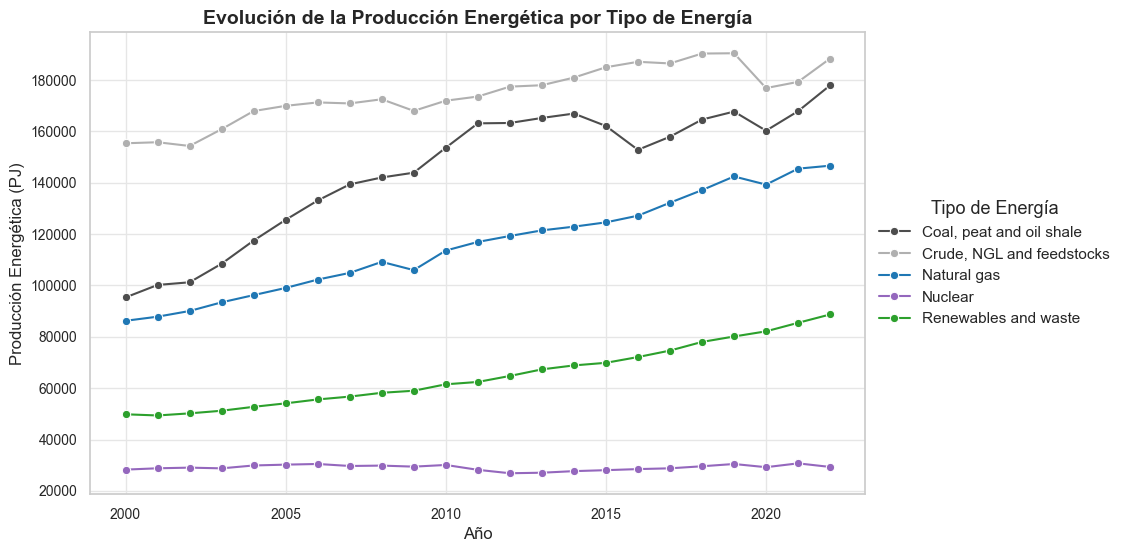

In [482]:

# Filtrado para la actividad "Production (PJ)" en la región "World"
df = filter_bal(
    balance, 
    Region="World", 
    Energy_Type=["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"], 
    Energy_Activity="Production (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Agrupar para obtener la suma de 'Energy_Value' por cada año y tipo de energía
df_grouped = df.groupby(['Year', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_grouped,
    x="Year",
    y="Energy_Value",
    hue="Energy_Type",
    palette=color_palette,
    marker="o",
    linewidth=1.5,
    ci=None  # Desactivar el sombreado de banda de confianza
)

# Ajuste de estilo y etiquetas
plt.title("Evolución de la Producción Energética por Tipo de Energía", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Producción Energética (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",             
    bbox_to_anchor=(1, 0.5)        # Mover la leyenda a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


In [551]:
# Filtrado para "Production (PJ)" en los años 2000 y 2022
df_filtered_production = filter_bal(
    balance, 
    Region="World", 
    Energy_Type=["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"], 
    Energy_Activity="Production (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Filtrar para los años 2000 y 2022 específicamente
df_filtered_production = df_filtered_production[df_filtered_production['Year'].isin([2000, 2022])]

# Agrupar por año y tipo de energía y calcular el total de producción de energía
df_grouped_production = df_filtered_production.groupby(['Year', 'Energy_Type'])['Energy_Value'].sum().unstack()

# Calcular la composición porcentual por tipo de energía para cada año
df_percent_composition_production = df_grouped_production.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Formatear los valores con porcentaje y 2 decimales
df_percent_composition_production = df_percent_composition_production.applymap(lambda x: f"{x:,.2f}%")

# Mostrar el DataFrame formateado
df_percent_composition_production



C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\741094249.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_percent_composition_production = df_percent_composition_production.applymap(lambda x: f"{x:,.2f}%")


Energy_Type,"Coal, peat and oil shale","Crude, NGL and feedstocks",Natural gas,Nuclear,Renewables and waste
Year,,,,,
2000,22.97%,37.43%,20.78%,6.81%,12.00%
2022,28.20%,29.85%,23.24%,4.65%,14.06%


In [485]:
import pandas as pd

# Filtrado para "Production (PJ)" en los años 2000 y 2022
df_filtered_production = filter_bal(
    balance, 
    Region="World", 
    Energy_Type=["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"], 
    Energy_Activity="Production (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Filtrar para los años 2000 y 2022 específicamente
df_filtered_production = df_filtered_production[df_filtered_production['Year'].isin([2000, 2022])]

# Agrupar por año y tipo de energía y calcular el total de producción de energía
df_grouped_production = df_filtered_production.groupby(['Year', 'Energy_Type'])['Energy_Value'].sum().unstack()

# Calcular la composición porcentual por tipo de energía para cada año
df_percent_composition_production = df_grouped_production.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Aplicar estilo minimalista y profesional con Styler
styled_df = df_percent_composition_production.style.format("{:.2f}%").set_properties(
    **{
        'background-color': '#f9f9f9',   # Fondo claro
        'color': '#333333',              # Texto en gris oscuro
        'border-color': '#e0e0e0',       # Bordes ligeros
        'font-family': 'Arial, sans-serif',  # Fuente sans-serif
        'font-size': '12px',             # Tamaño de fuente
    }
).set_table_styles(
    [
        {
            'selector': 'thead th',
            'props': [('background-color', '#f3f3f3'), ('color', '#333333'), ('font-weight', 'bold'), ('border-bottom', '1px solid #e0e0e0')]
        },
        {
            'selector': 'tbody th',
            'props': [('color', '#222222'), ('font-weight', 'bold')]  # Texto más oscuro para las filas de índice
        },
        {
            'selector': 'tbody td, tbody th',
            'props': [('background-color', '#f9f9f9'), ('padding', '8px'), ('border', '1px solid #e0e0e0')]
        }
    ]
).set_caption("Composición Porcentual de la Producción de Energía por Tipo (2000 vs 2022)")

# Mostrar la tabla estilizada
styled_df



Energy_Type,"Coal, peat and oil shale","Crude, NGL and feedstocks",Natural gas,Nuclear,Renewables and waste
Year,,,,,
2000,22.97%,37.43%,20.78%,6.81%,12.00%
2022,28.20%,29.85%,23.24%,4.65%,14.06%


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\2627528160.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


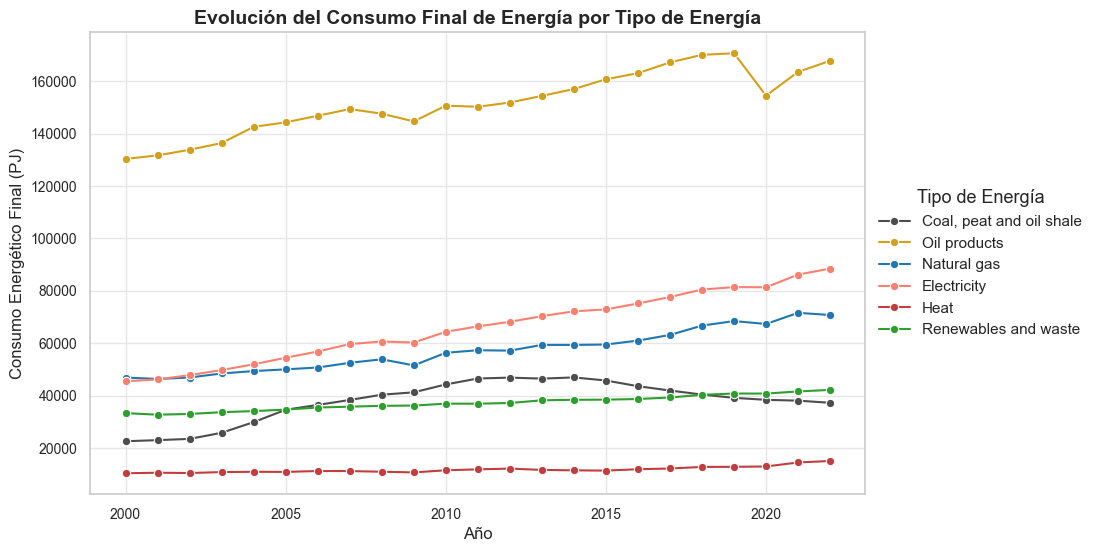

In [573]:
# Filtrado para el tipo de actividad "Total final consumption (PJ)" y la región "World"
df = filter_bal(
    balance, 
    Region="World", 
    Energy_Type=["Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"], 
    Energy_Activity="Total final consumption (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Agrupar para obtener la suma de 'Energy_Value' por cada año y tipo de energía
df_grouped = df.groupby(['Year', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Definir el orden específico de los tipos de energía en la leyenda
energy_order = ["Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"]

# Gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_grouped,
    x="Year",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_order,     # Asegura el orden específico en la leyenda
    palette=color_palette,
    marker="o",
    linewidth=1.5,
    ci=None
)

# Ajuste de estilo y etiquetas
plt.title("Evolución del Consumo Final de Energía por Tipo de Energía", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Consumo Energético Final (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)      # Leyenda a la derecha fuera del gráfico
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


In [575]:
# Filtrado para "Total final consumption (PJ)" en los años 2000 y 2022, incluyendo todos los tipos de energía de Consumo
df_filtered_consumption = filter_bal(
    balance, 
    Region="World", 
    Energy_Type=["Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"], 
    Energy_Activity="Total final consumption (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Filtrar para los años 2000 y 2022 específicamente
df_filtered_consumption = df_filtered_consumption[df_filtered_consumption['Year'].isin([2000, 2022])]

# Agrupar por año y tipo de energía y calcular el total de consumo de energía, asegurando el orden de columnas
df_grouped_consumption = df_filtered_consumption.groupby(['Year', 'Energy_Type'])['Energy_Value'].sum().unstack()

# Asegurar el orden de columnas según la lista proporcionada
df_grouped_consumption = df_grouped_consumption.reindex(columns=["Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"])

# Calcular la composición porcentual por tipo de energía para cada año
df_percent_composition_consumption = df_grouped_consumption.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Aplicar estilo minimalista y profesional con Styler
styled_df_consumption = df_percent_composition_consumption.style.format("{:.2f}%").set_properties(
    **{
        'background-color': '#f9f9f9',   # Fondo claro
        'color': '#333333',              # Texto en gris oscuro
        'border-color': '#e0e0e0',       # Bordes ligeros
        'font-family': 'Arial, sans-serif',  # Fuente sans-serif
        'font-size': '12px',             # Tamaño de fuente
    }
).set_table_styles(
    [
        {
            'selector': 'thead th',
            'props': [('background-color', '#f3f3f3'), ('color', '#333333'), ('font-weight', 'bold'), ('border-bottom', '1px solid #e0e0e0')]
        },
        {
            'selector': 'tbody th',
            'props': [('color', '#222222'), ('font-weight', 'bold')]  # Texto más oscuro para las filas de índice
        },
        {
            'selector': 'tbody td, tbody th',
            'props': [('background-color', '#f9f9f9'), ('padding', '8px'), ('border', '1px solid #e0e0e0')]
        }
    ]
).set_caption("Composición Porcentual del Consumo Final de Energía por Tipo (2000 vs 2022)")

# Mostrar la tabla estilizada
styled_df_consumption



Energy_Type,"Coal, peat and oil shale",Oil products,Natural gas,Electricity,Heat,Renewables and waste
Year,,,,,,
2000,7.82%,45.08%,16.23%,15.74%,3.59%,11.53%
2022,8.84%,39.80%,16.79%,20.99%,3.58%,10.01%


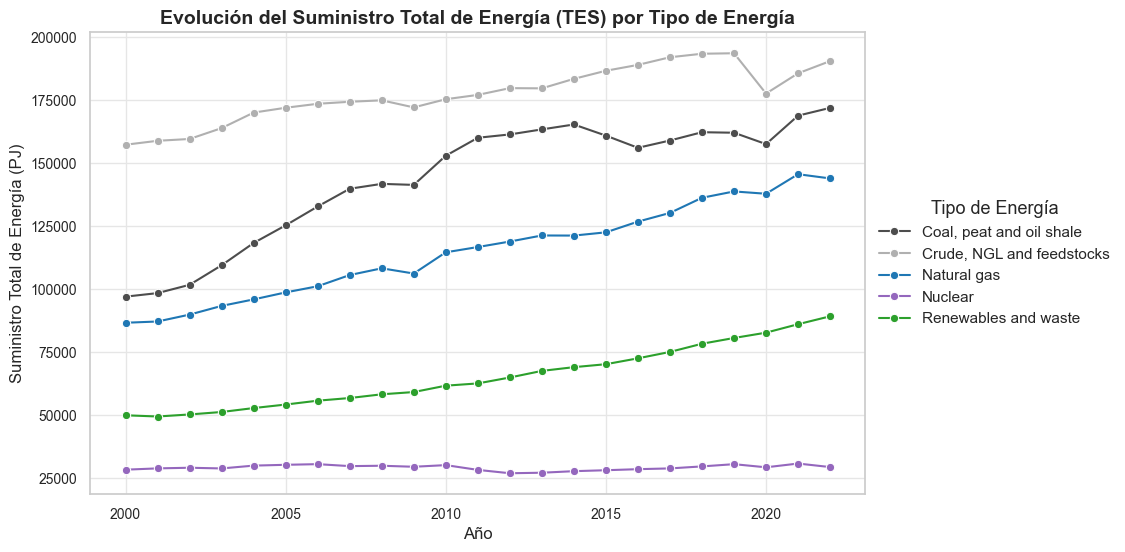

In [488]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrado para el tipo de actividad "Total energy supply (PJ)"
df = filter_bal(
    balance, 
    Region="World", 
    Energy_Type=["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"], 
    Energy_Activity="Total energy supply (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="Year",
    y="Energy_Value",
    hue="Energy_Type",
    palette=color_palette,
    marker="o",
    linewidth=1.5
)

# Ajuste de estilo y etiquetas
plt.title("Evolución del Suministro Total de Energía (TES) por Tipo de Energía", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Suministro Total de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",             # Posición de la leyenda
    bbox_to_anchor=(1, 0.5)        # Coordenadas para mover la leyenda fuera del gráfico, a la derecha
)  # Leyenda sin borde
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


In [489]:
# Filtrado para "Total energy supply (PJ)" en los años 2000 y 2022
df_filtered_tes = filter_bal(
    balance, 
    Region="World", 
    Energy_Type=["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"], 
    Energy_Activity="Total energy supply (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Filtrar para los años 2000 y 2022 específicamente
df_filtered_tes = df_filtered_tes[df_filtered_tes['Year'].isin([2000, 2022])]

# Agrupar por año y tipo de energía y calcular el total de suministro de energía
df_grouped_tes = df_filtered_tes.groupby(['Year', 'Energy_Type'])['Energy_Value'].sum().unstack()

# Calcular la composición porcentual por tipo de energía para cada año
df_percent_composition_tes = df_grouped_tes.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Aplicar estilo minimalista y profesional con Styler
styled_df_tes = df_percent_composition_tes.style.format("{:.2f}%").set_properties(
    **{
        'background-color': '#f9f9f9',   # Fondo claro
        'color': '#333333',              # Texto en gris oscuro
        'border-color': '#e0e0e0',       # Bordes ligeros
        'font-family': 'Arial, sans-serif',  # Fuente sans-serif
        'font-size': '12px',             # Tamaño de fuente
    }
).set_table_styles(
    [
        {
            'selector': 'thead th',
            'props': [('background-color', '#f3f3f3'), ('color', '#333333'), ('font-weight', 'bold'), ('border-bottom', '1px solid #e0e0e0')]
        },
        {
            'selector': 'tbody th',
            'props': [('color', '#222222'), ('font-weight', 'bold')]  # Texto más oscuro para las filas de índice
        },
        {
            'selector': 'tbody td, tbody th',
            'props': [('background-color', '#f9f9f9'), ('padding', '8px'), ('border', '1px solid #e0e0e0')]
        }
    ]
).set_caption("Composición Porcentual del Suministro Total de Energía (TES) por Tipo (2000 vs 2022)")

# Mostrar la tabla estilizada
styled_df_tes


Energy_Type,"Coal, peat and oil shale","Crude, NGL and feedstocks",Natural gas,Nuclear,Renewables and waste
Year,,,,,
2000,23.14%,37.54%,20.67%,6.75%,11.90%
2022,27.52%,30.49%,23.03%,4.69%,14.27%


# Análisis de Mercados Potenciales

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\329038080.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_producers['Region'] = pd.Categorical(df_top_producers['Region'], categories=top_producers_order, ordered=True)


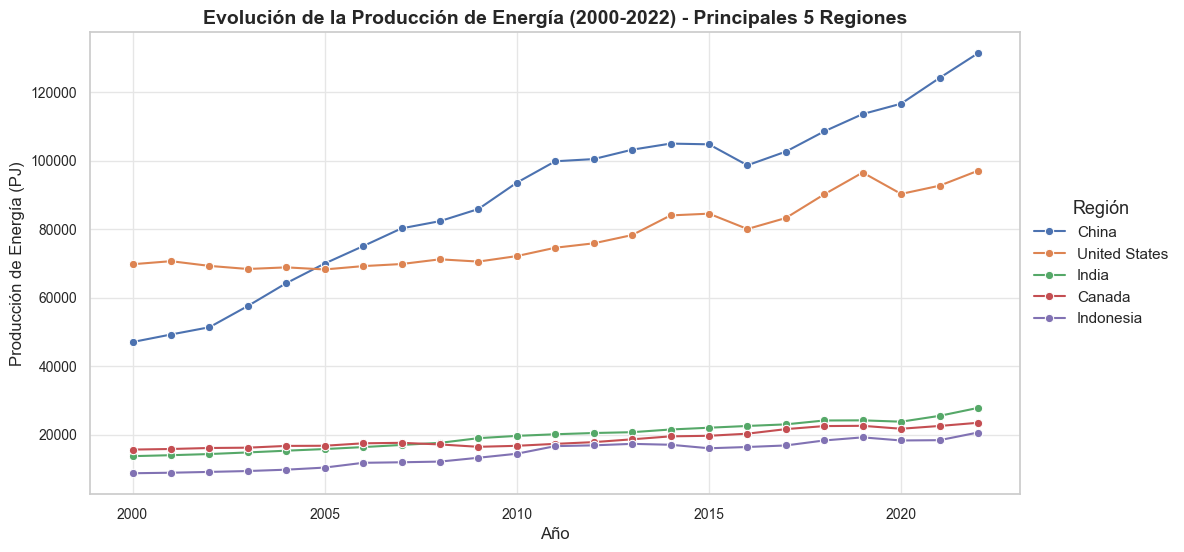

In [578]:
# Filtrar datos para "Production (PJ)" en el periodo 2000-2022 para el tipo de energía "Total"
df_production = filter_bal(
    balance,
    Energy_Activity="Production (PJ)",
    Energy_Type="Total",   # Usar solo "Total" para evitar duplicaciones
    Start_Year=2000,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_production = df_production[df_production['Region'].isin(valid_regions)]

# Agrupar por región y año para obtener el total de producción por región y año
df_total_production = df_production.groupby(['Region', 'Year'])['Energy_Value'].sum().reset_index()

# Identificar las 5 regiones con mayores producciones en el último año (2022)
top_producers_2022 = df_total_production[df_total_production['Year'] == 2022].nlargest(5, 'Energy_Value')['Region']

# Filtrar los datos para estas 5 regiones y ordenar la leyenda de mayor a menor
df_top_producers = df_total_production[df_total_production['Region'].isin(top_producers_2022)]
top_producers_order = df_total_production[df_total_production['Year'] == 2022].nlargest(5, 'Energy_Value')['Region'].values
df_top_producers['Region'] = pd.Categorical(df_top_producers['Region'], categories=top_producers_order, ordered=True)

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_producers,
    x="Year",
    y="Energy_Value",
    hue="Region",
    marker="o",
    linewidth=1.5,
    hue_order=top_producers_order  # Ordenar la leyenda de mayor a menor
)

# Ajuste de estilo y etiquetas
plt.title("Evolución de la Producción de Energía (2000-2022) - Principales 5 Regiones", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Producción de Energía (PJ)", fontsize=12)
plt.legend(
    title="Región",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\1869111288.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_producers_2022['Region'] = pd.Categorical(df_top_producers_2022['Region'], categories=region_order, ordered=True)


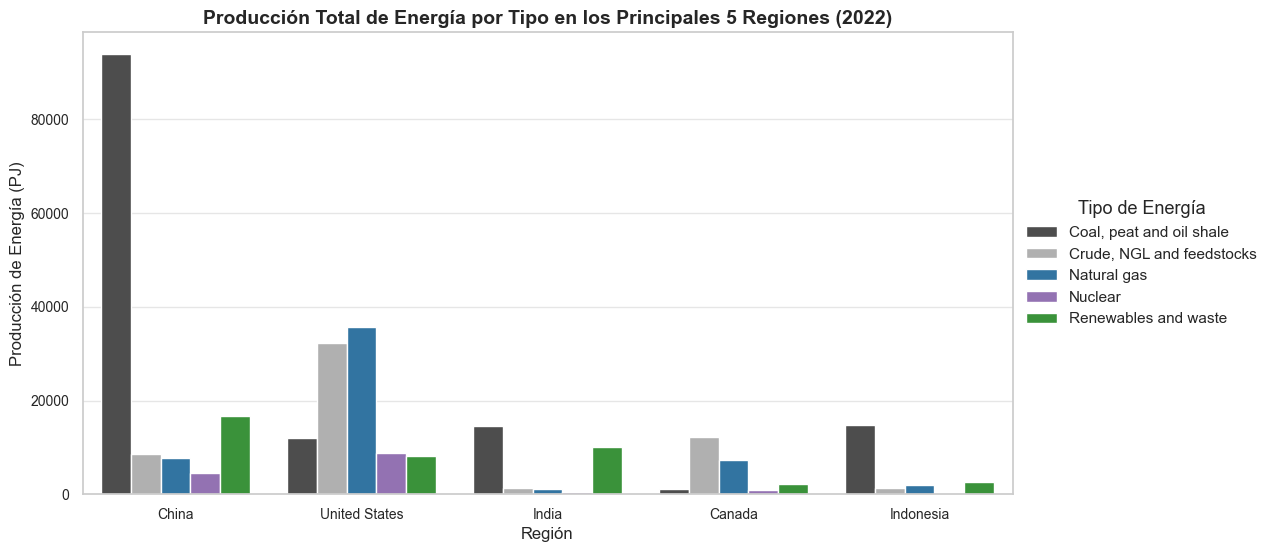

In [591]:
# Filtrar datos para "Production (PJ)" en el último año (2022) para los tipos de energía especificados y regiones válidas
df_production_2022 = filter_bal(
    balance,
    Energy_Activity="Production (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Filtrar solo las regiones válidas
df_production_2022 = df_production_2022[df_production_2022['Region'].isin(valid_regions)]

# Incluir todos los tipos de energía para producción, según la lista proporcionada
valid_energy_types = [
    "Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"
]
df_production_2022 = df_production_2022[df_production_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por región y tipo de energía para obtener el total de producción por tipo de energía
df_total_production_2022 = df_production_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Identificar las 5 regiones con mayor producción total en 2022
top_producers_2022 = df_total_production_2022.groupby('Region')['Energy_Value'].sum().nlargest(5).index

# Filtrar los datos para estas 5 regiones
df_top_producers_2022 = df_total_production_2022[df_total_production_2022['Region'].isin(top_producers_2022)]

# Ordenar el eje X de mayor a menor volumen de producción
region_order = df_top_producers_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_top_producers_2022['Region'] = pd.Categorical(df_top_producers_2022['Region'], categories=region_order, ordered=True)

# Definir el orden específico de tipos de energía para la leyenda
energy_order = ["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"]

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_top_producers_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_order,    # Asegurar el orden específico de la leyenda
    palette=color_palette      # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Producción Total de Energía por Tipo en los Principales 5 Regiones (2022)", fontsize=14, weight='bold')
plt.xlabel("Región", fontsize=12)
plt.ylabel("Producción de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\2337496861.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_consumers['Region'] = pd.Categorical(df_top_consumers['Region'], categories=top_consumers_order, ordered=True)


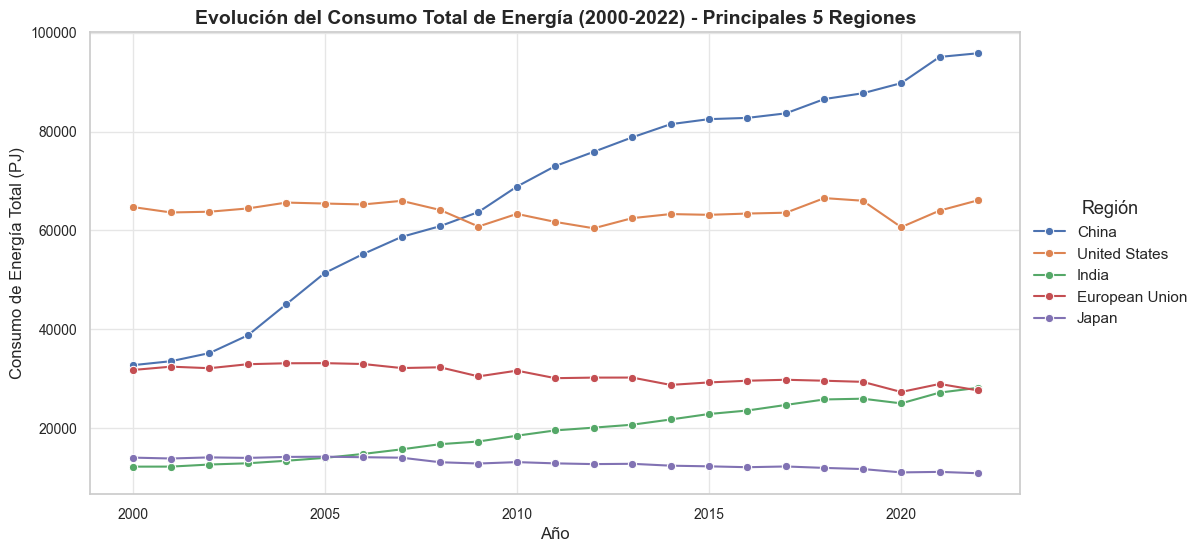

In [577]:
# Filtrar datos para "Total final consumption (PJ)" en el periodo 2000-2022 para el tipo de energía "Total"
df_consumption = filter_bal(
    balance,
    Energy_Activity="Total final consumption (PJ)",
    Energy_Type="Total",   # Usar solo "Total" para evitar duplicaciones
    Start_Year=2000,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_consumption = df_consumption[df_consumption['Region'].isin(valid_regions)]

# Agrupar por región y año para obtener el total de consumo por región y año
df_total_consumption = df_consumption.groupby(['Region', 'Year'])['Energy_Value'].sum().reset_index()

# Identificar las 5 regiones con mayor consumo en el último año (2022)
top_consumers_2022 = df_total_consumption[df_total_consumption['Year'] == 2022].nlargest(5, 'Energy_Value')['Region']

# Filtrar los datos para estas 5 regiones y ordenar la leyenda de mayor a menor
df_top_consumers = df_total_consumption[df_total_consumption['Region'].isin(top_consumers_2022)]
top_consumers_order = df_total_consumption[df_total_consumption['Year'] == 2022].nlargest(5, 'Energy_Value')['Region'].values
df_top_consumers['Region'] = pd.Categorical(df_top_consumers['Region'], categories=top_consumers_order, ordered=True)

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_consumers,
    x="Year",
    y="Energy_Value",
    hue="Region",
    marker="o",
    linewidth=1.5,
    hue_order=top_consumers_order  # Ordenar la leyenda de mayor a menor
)

# Ajuste de estilo y etiquetas
plt.title("Evolución del Consumo Total de Energía (2000-2022) - Principales 5 Regiones", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Consumo de Energía Total (PJ)", fontsize=12)
plt.legend(
    title="Región",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\1422209586.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_consumers_2022['Region'] = pd.Categorical(df_top_consumers_2022['Region'], categories=region_order, ordered=True)


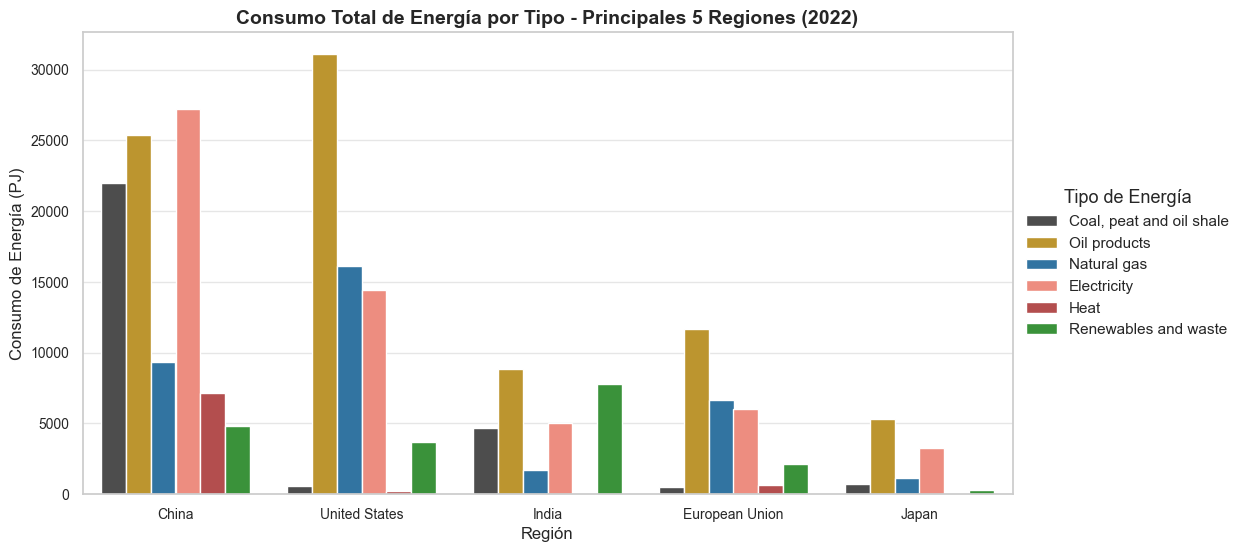

In [583]:
# Filtrar datos para "Total final consumption (PJ)" en el último año (2022) para los tipos de energía especificados y regiones válidas
df_consumption_2022 = filter_bal(
    balance,
    Energy_Activity="Total final consumption (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_consumption_2022 = df_consumption_2022[df_consumption_2022['Region'].isin(valid_regions)]

# Incluir los tipos de energía específicos para consumo
valid_energy_types = [
    "Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"
]
df_consumption_2022 = df_consumption_2022[df_consumption_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por región y tipo de energía para obtener el total de consumo por tipo de energía
df_total_consumption_2022 = df_consumption_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Identificar las 6 regiones con mayor consumo total en 2022
top_consumers_2022 = df_total_consumption_2022.groupby('Region')['Energy_Value'].sum().nlargest(5).index

# Filtrar los datos para estas 6 regiones
df_top_consumers_2022 = df_total_consumption_2022[df_total_consumption_2022['Region'].isin(top_consumers_2022)]

# Ordenar el eje X de mayor a menor volumen de consumo
region_order = df_top_consumers_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_top_consumers_2022['Region'] = pd.Categorical(df_top_consumers_2022['Region'], categories=region_order, ordered=True)

# Definir el orden de los tipos de energía en la leyenda
energy_type_order = ["Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"]

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_top_consumers_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_type_order,  # Asegurar el orden de la leyenda
    palette=color_palette  # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Consumo Total de Energía por Tipo - Principales 5 Regiones (2022)", fontsize=14, weight='bold')
plt.xlabel("Región", fontsize=12)
plt.ylabel("Consumo de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()




C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\2881620478.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_importers['Region'] = pd.Categorical(df_top_importers['Region'], categories=top_importers_order, ordered=True)


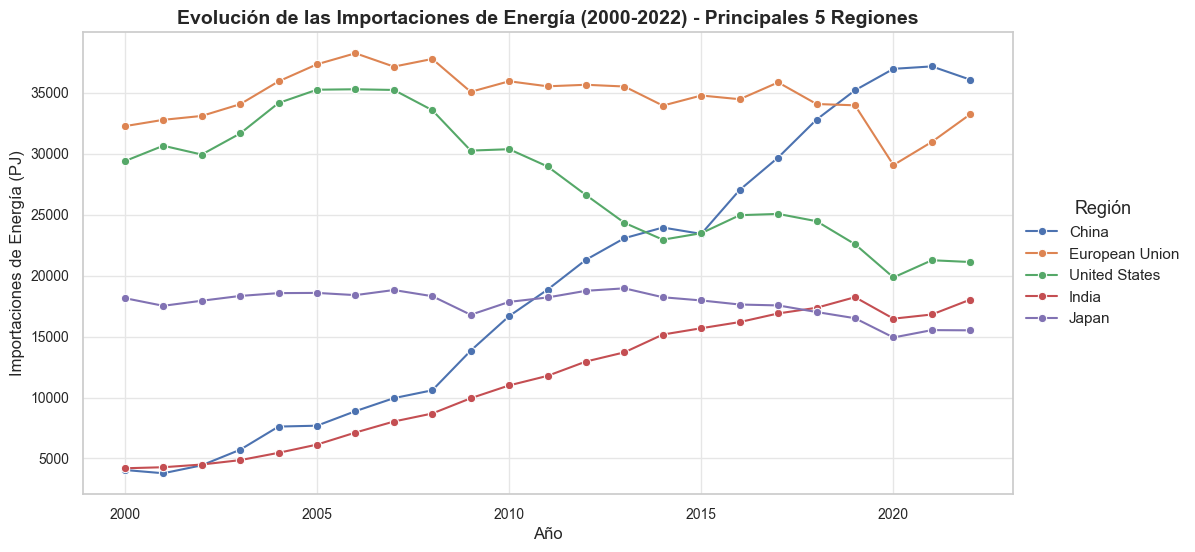

In [585]:
# Filtrar datos para "Imports (PJ)" en el periodo 2000-2022 para el tipo de energía "Total"
df_imports = filter_bal(
    balance,
    Energy_Activity="Imports (PJ)",
    Energy_Type="Total",   # Usar "Total" para obtener el total de importaciones
    Start_Year=2000,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_imports = df_imports[df_imports['Region'].isin(valid_regions)]

# Agrupar por región y año para obtener el total de importaciones por región y año
df_total_imports = df_imports.groupby(['Region', 'Year'])['Energy_Value'].sum().reset_index()

# Identificar las 5 regiones con mayores importaciones en el último año (2022)
top_importers_2022 = df_total_imports[df_total_imports['Year'] == 2022].nlargest(5, 'Energy_Value')['Region']

# Filtrar los datos para estas 5 regiones y ordenar la leyenda de mayor a menor
df_top_importers = df_total_imports[df_total_imports['Region'].isin(top_importers_2022)]
top_importers_order = df_total_imports[df_total_imports['Year'] == 2022].nlargest(5, 'Energy_Value')['Region'].values
df_top_importers['Region'] = pd.Categorical(df_top_importers['Region'], categories=top_importers_order, ordered=True)

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_importers,
    x="Year",
    y="Energy_Value",
    hue="Region",
    marker="o",
    linewidth=1.5,
    hue_order=top_importers_order  # Ordenar la leyenda de mayor a menor
)

# Ajuste de estilo y etiquetas
plt.title("Evolución de las Importaciones de Energía (2000-2022) - Principales 5 Regiones", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Importaciones de Energía (PJ)", fontsize=12)
plt.legend(
    title="Región",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\2096478826.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_importers_2022['Region'] = pd.Categorical(df_top_importers_2022['Region'], categories=region_order, ordered=True)


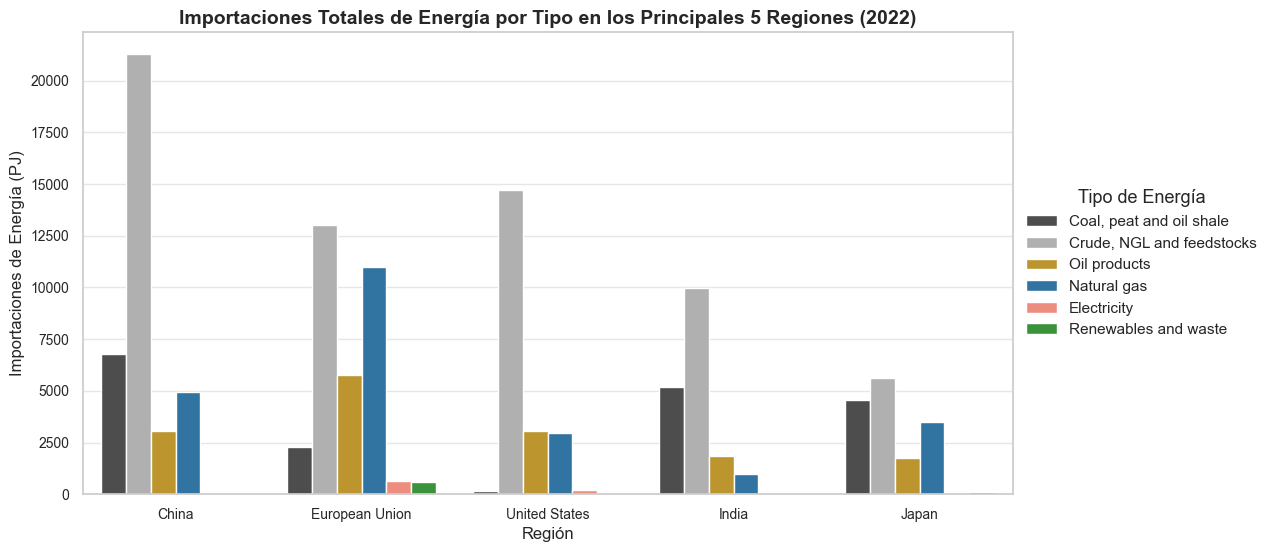

In [586]:
# Filtrar datos para "Imports (PJ)" en el último año (2022) para los tipos de energía especificados y regiones válidas
df_imports_2022 = filter_bal(
    balance,
    Energy_Activity="Imports (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_imports_2022 = df_imports_2022[df_imports_2022['Region'].isin(valid_regions)]

# Incluir los tipos de energía específicos para importaciones
valid_energy_types = [
    "Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"
]
df_imports_2022 = df_imports_2022[df_imports_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por región y tipo de energía para obtener el total de importaciones por tipo de energía
df_total_imports_2022 = df_imports_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Identificar las 5 regiones con mayor importación total en 2022
top_importers_2022 = df_total_imports_2022.groupby('Region')['Energy_Value'].sum().nlargest(5).index

# Filtrar los datos para estas 5 regiones
df_top_importers_2022 = df_total_imports_2022[df_total_imports_2022['Region'].isin(top_importers_2022)]

# Ordenar el eje X de mayor a menor volumen de importaciones
region_order = df_top_importers_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_top_importers_2022['Region'] = pd.Categorical(df_top_importers_2022['Region'], categories=region_order, ordered=True)

# Definir el orden de los tipos de energía en la leyenda
energy_type_order = ["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"]

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_top_importers_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_type_order,  # Ordenar la leyenda con el orden específico
    palette=color_palette  # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Importaciones Totales de Energía por Tipo en los Principales 5 Regiones (2022)", fontsize=14, weight='bold')
plt.xlabel("Región", fontsize=12)
plt.ylabel("Importaciones de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()




C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\1437498915.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_exporters['Region'] = pd.Categorical(df_top_exporters['Region'], categories=top_exporters_order, ordered=True)


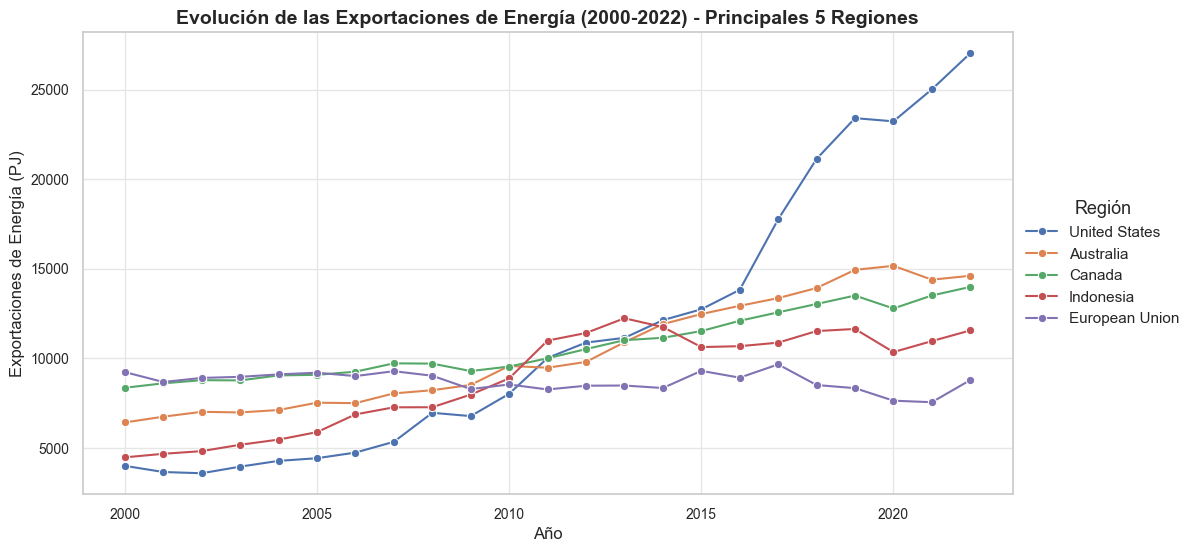

In [594]:
# Filtrar datos para "Exports (PJ)" en el periodo 2000-2022 para el tipo de energía "Total"
df_exports = filter_bal(
    balance,
    Energy_Activity="Exports (PJ)",
    Energy_Type="Total",   # Usar "Total" para obtener el total de exportaciones
    Start_Year=2000,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_exports = df_exports[df_exports['Region'].isin(valid_regions)]

# Agrupar por región y año para obtener el total de exportaciones por región y año
df_total_exports = df_exports.groupby(['Region', 'Year'])['Energy_Value'].sum().reset_index()

# Identificar las 6 regiones con mayores exportaciones en el último año (2022)
top_exporters_2022 = df_total_exports[df_total_exports['Year'] == 2022].nlargest(5, 'Energy_Value')['Region']

# Filtrar los datos para estas 6 regiones y ordenar la leyenda de mayor a menor
df_top_exporters = df_total_exports[df_total_exports['Region'].isin(top_exporters_2022)]
top_exporters_order = df_total_exports[df_total_exports['Year'] == 2022].nlargest(5, 'Energy_Value')['Region'].values
df_top_exporters['Region'] = pd.Categorical(df_top_exporters['Region'], categories=top_exporters_order, ordered=True)

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_exporters,
    x="Year",
    y="Energy_Value",
    hue="Region",
    marker="o",
    linewidth=1.5,
    hue_order=top_exporters_order  # Ordenar la leyenda de mayor a menor
)

# Ajuste de estilo y etiquetas
plt.title("Evolución de las Exportaciones de Energía (2000-2022) - Principales 5 Regiones", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Exportaciones de Energía (PJ)", fontsize=12)
plt.legend(
    title="Región",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\121985764.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_exporters_2022['Region'] = pd.Categorical(df_top_exporters_2022['Region'], categories=region_order, ordered=True)


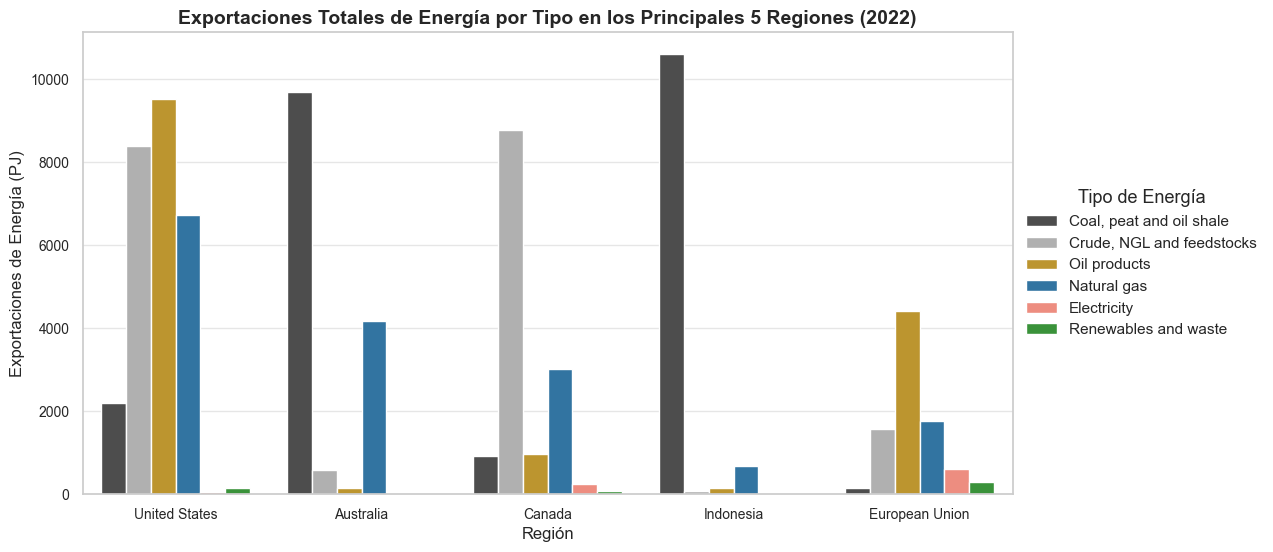

In [593]:
# Filtrar datos para "Exports (PJ)" en el último año (2022) para los tipos de energía especificados y regiones válidas
df_exports_2022 = filter_bal(
    balance,
    Energy_Activity="Exports (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_exports_2022 = df_exports_2022[df_exports_2022['Region'].isin(valid_regions)]

# Incluir los tipos de energía específicos para exportaciones
valid_energy_types = [
    "Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"
]
df_exports_2022 = df_exports_2022[df_exports_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por región y tipo de energía para obtener el total de exportaciones por tipo de energía
df_total_exports_2022 = df_exports_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Identificar las 6 regiones con mayor exportación total en 2022
top_exporters_2022 = df_total_exports_2022.groupby('Region')['Energy_Value'].sum().nlargest(5).index

# Filtrar los datos para estas 6 regiones
df_top_exporters_2022 = df_total_exports_2022[df_total_exports_2022['Region'].isin(top_exporters_2022)]

# Ordenar el eje X de mayor a menor volumen de exportaciones
region_order = df_top_exporters_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_top_exporters_2022['Region'] = pd.Categorical(df_top_exporters_2022['Region'], categories=region_order, ordered=True)

# Definir el orden de los tipos de energía en la leyenda
energy_type_order = ["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"]

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_top_exporters_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_type_order,  # Asegurar el orden de la leyenda con el orden específico
    palette=color_palette  # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Exportaciones Totales de Energía por Tipo en los Principales 5 Regiones (2022)", fontsize=14, weight='bold')
plt.xlabel("Región", fontsize=12)
plt.ylabel("Exportaciones de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


# Producción de Energia Renovable

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\2394482133.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_renewable_producers['Region'] = pd.Categorical(df_top_renewable_producers['Region'], categories=top_renewable_producers_order, ordered=True)


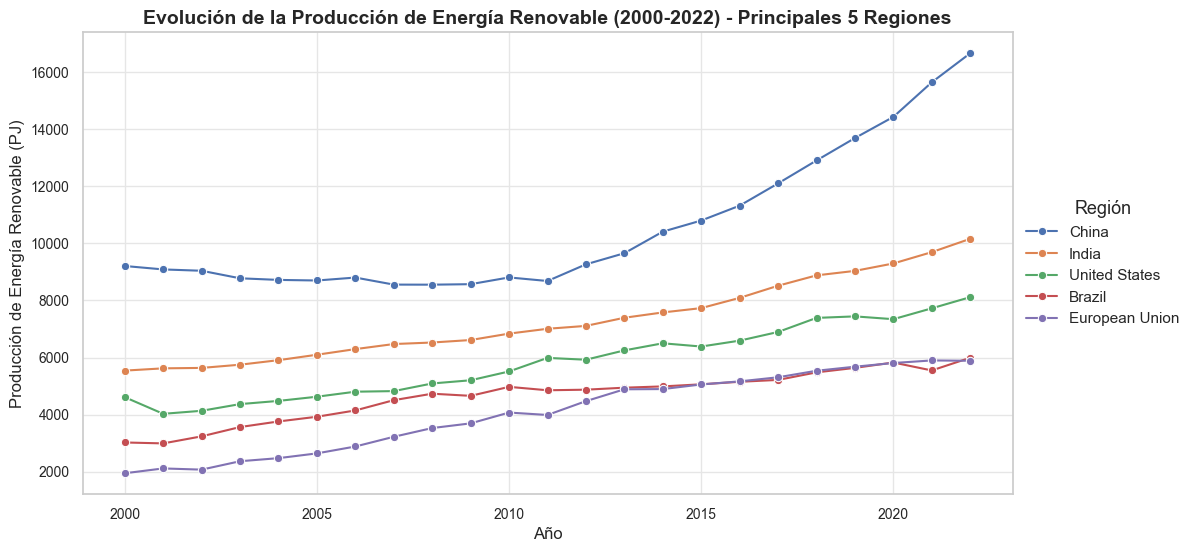

In [ ]:
# Filtrar datos para "Production (PJ)" y solo energía renovable en el periodo 2000-2022
df_renewable_production = filter_bal(
    balance,
    Energy_Activity="Production (PJ)",
    Energy_Type=["Renewables and waste"],  # Filtrar solo energía renovable
    Start_Year=2000,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_renewable_production = df_renewable_production[df_renewable_production['Region'].isin(valid_regions)]

# Agrupar por región y año para obtener el total de producción renovable por región y año
df_total_renewable_production = df_renewable_production.groupby(['Region', 'Year'])['Energy_Value'].sum().reset_index()

# Identificar las 5 regiones con mayor producción de energía renovable en el último año disponible (2022)
top_renewable_producers_2022 = df_total_renewable_production[df_total_renewable_production['Year'] == 2022].nlargest(5, 'Energy_Value')['Region']

# Filtrar los datos para estas 5 regiones y ordenar la leyenda de mayor a menor
df_top_renewable_producers = df_total_renewable_production[df_total_renewable_production['Region'].isin(top_renewable_producers_2022)]
top_renewable_producers_order = df_total_renewable_production[df_total_renewable_production['Year'] == 2022].nlargest(5, 'Energy_Value')['Region'].values
df_top_renewable_producers['Region'] = pd.Categorical(df_top_renewable_producers['Region'], categories=top_renewable_producers_order, ordered=True)

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_renewable_producers,
    x="Year",
    y="Energy_Value",
    hue="Region",
    marker="o",
    linewidth=1.5,
    hue_order=top_renewable_producers_order  # Ordenar la leyenda de mayor a menor
)

# Ajuste de estilo y etiquetas
plt.title("Evolución de la Producción de Energía Renovable (2000-2022) - Principales 5 Regiones", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Producción de Energía Renovable (PJ)", fontsize=12)
plt.legend(
    title="Región",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\2526371930.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_renewables['Region'] = pd.Categorical(df_top_renewables['Region'], categories=region_order, ordered=True)


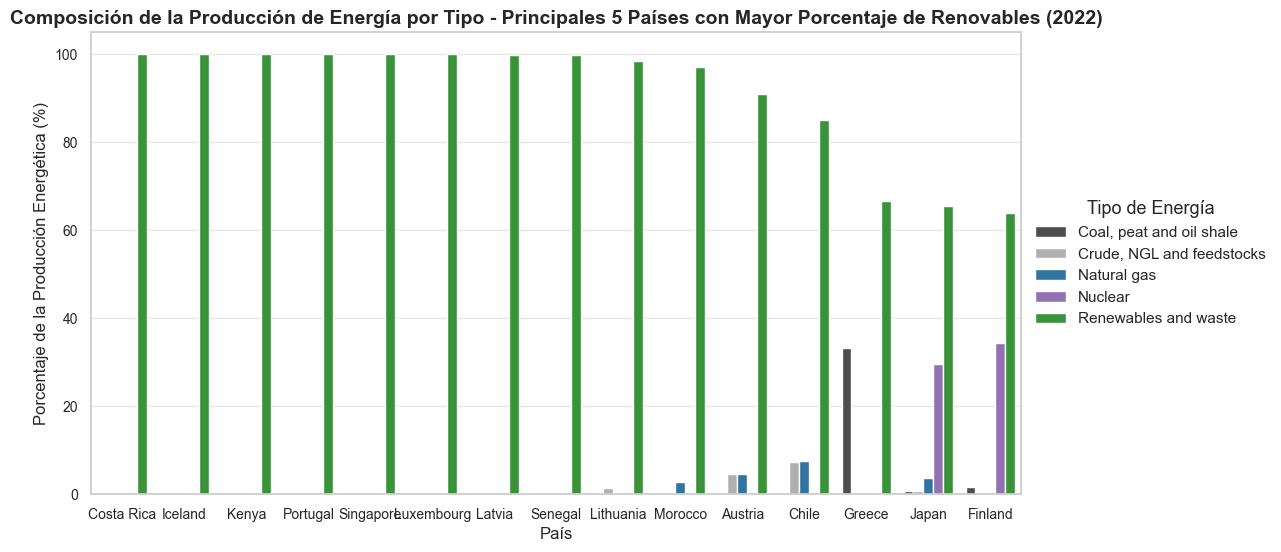

In [ ]:
# Hay paises que producen pura energia renovable
# Filtrar datos para "Production (PJ)" en el último año (2022) para los tipos de energía especificados y regiones válidas
df_production_2022 = filter_bal(
    balance,
    Energy_Activity="Production (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_production_2022 = df_production_2022[df_production_2022['Region'].isin(valid_regions)]

# Excluir el tipo "Total" en Energy_Type
df_production_2022 = df_production_2022[df_production_2022['Energy_Type'] != "Total"]

# Incluir todos los tipos de energía para producción, según la lista proporcionada
valid_energy_types = [
    "Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"
]
df_production_2022 = df_production_2022[df_production_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por región y tipo de energía para obtener el total de producción por tipo de energía
df_total_production_2022 = df_production_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Calcular el total de producción por región excluyendo "Total" en Energy_Type
df_total_by_region = df_total_production_2022.groupby('Region')['Energy_Value'].sum().reset_index()
df_total_by_region = df_total_by_region.rename(columns={'Energy_Value': 'Total_Production'})

# Combinar el total de producción con el conjunto de datos principal para calcular los porcentajes
df_production_with_total = pd.merge(df_total_production_2022, df_total_by_region, on='Region')
df_production_with_total['Percentage'] = (df_production_with_total['Energy_Value'] / df_production_with_total['Total_Production']) * 100

# Filtrar solo los datos de "Renewables and waste" para identificar los países con mayor porcentaje de renovables
df_renewables = df_production_with_total[df_production_with_total['Energy_Type'] == "Renewables and waste"]
top_renewables_countries = df_renewables.nlargest(5, 'Percentage')['Region']

# Ahora, filtrar el conjunto de datos original para estos 5 países pero manteniendo todos los tipos de energía
df_top_renewables = df_production_with_total[df_production_with_total['Region'].isin(top_renewables_countries)]

# Ordenar el eje X de mayor a menor porcentaje de Renewables
region_order = df_top_renewables[df_top_renewables['Energy_Type'] == "Renewables and waste"].sort_values(by='Percentage', ascending=False)['Region']
df_top_renewables['Region'] = pd.Categorical(df_top_renewables['Region'], categories=region_order, ordered=True)

# Definir el orden específico de tipos de energía para la leyenda
energy_order = ["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"]

# Graficar en columnas apiladas
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_top_renewables,
    x="Region",
    y="Percentage",
    hue="Energy_Type",
    hue_order=energy_order,    # Asegurar el orden específico de la leyenda
    palette=color_palette      # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Composición de la Producción de Energía por Tipo - Principales 5 Países con Mayor Porcentaje de Renovables (2022)", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Porcentaje de la Producción Energética (%)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\153521943.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_renewables['Region'] = pd.Categorical(df_top_renewables['Region'], categories=region_order, ordered=True)


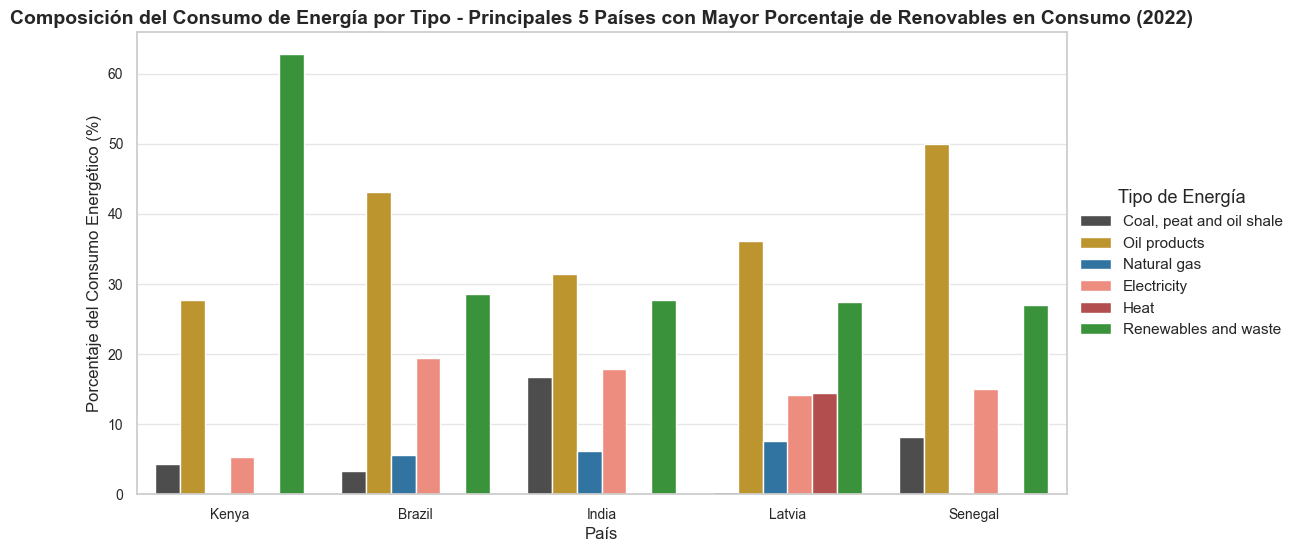

In [599]:
# Filtrar datos para "Total final consumption (PJ)" en el último año (2022) para los tipos de energía especificados y regiones válidas
df_consumption_2022 = filter_bal(
    balance,
    Energy_Activity="Total final consumption (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Filtrar solo para las regiones válidas
df_consumption_2022 = df_consumption_2022[df_consumption_2022['Region'].isin(valid_regions)]

# Excluir el tipo "Total" en Energy_Type
df_consumption_2022 = df_consumption_2022[df_consumption_2022['Energy_Type'] != "Total"]

# Incluir todos los tipos de energía para consumo, según la lista proporcionada
valid_energy_types = [
    "Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"
]
df_consumption_2022 = df_consumption_2022[df_consumption_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por región y tipo de energía para obtener el total de consumo por tipo de energía
df_total_consumption_2022 = df_consumption_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Calcular el total de consumo por región excluyendo "Total" en Energy_Type
df_total_by_region = df_total_consumption_2022.groupby('Region')['Energy_Value'].sum().reset_index()
df_total_by_region = df_total_by_region.rename(columns={'Energy_Value': 'Total_Consumption'})

# Combinar el total de consumo con el conjunto de datos principal para calcular los porcentajes
df_consumption_with_total = pd.merge(df_total_consumption_2022, df_total_by_region, on='Region')
df_consumption_with_total['Percentage'] = (df_consumption_with_total['Energy_Value'] / df_consumption_with_total['Total_Consumption']) * 100

# Filtrar solo los datos de "Renewables and waste" para identificar los países con mayor porcentaje de renovables en consumo
df_renewables = df_consumption_with_total[df_consumption_with_total['Energy_Type'] == "Renewables and waste"]
top_renewables_countries = df_renewables.nlargest(5, 'Percentage')['Region']

# Ahora, filtrar el conjunto de datos original para estos 5 países pero manteniendo todos los tipos de energía
df_top_renewables = df_consumption_with_total[df_consumption_with_total['Region'].isin(top_renewables_countries)]

# Ordenar el eje X de mayor a menor porcentaje de Renewables
region_order = df_top_renewables[df_top_renewables['Energy_Type'] == "Renewables and waste"].sort_values(by='Percentage', ascending=False)['Region']
df_top_renewables['Region'] = pd.Categorical(df_top_renewables['Region'], categories=region_order, ordered=True)

# Definir el orden específico de tipos de energía para la leyenda
energy_order = ["Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"]

# Graficar en columnas apiladas
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_top_renewables,
    x="Region",
    y="Percentage",
    hue="Energy_Type",
    hue_order=energy_order,    # Asegurar el orden específico de la leyenda
    palette=color_palette      # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Composición del Consumo de Energía por Tipo - Principales 5 Países con Mayor Porcentaje de Renovables en Consumo (2022)", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Porcentaje del Consumo Energético (%)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


# Análisis Unión Europea

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\262107709.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


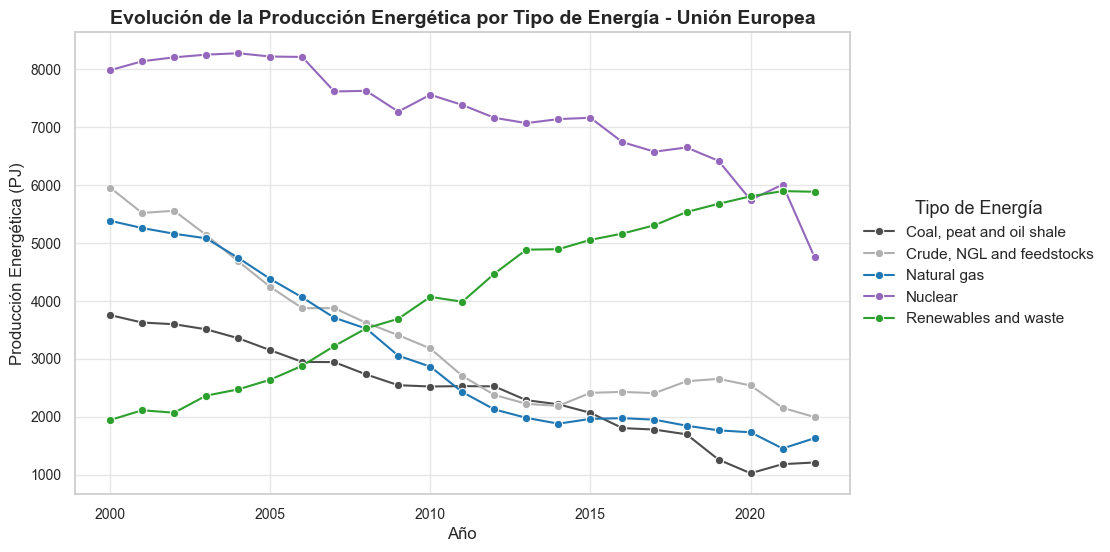

In [ ]:
# Filtrar datos para la región "European Union" y la actividad "Production (PJ)" entre 2000 y 2022
df = filter_bal(
    balance, 
    Region="European Union", 
    Energy_Type=["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"], 
    Energy_Activity="Production (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Agrupar para obtener la suma de 'Energy_Value' por cada año y tipo de energía
df_grouped = df.groupby(['Year', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_grouped,
    x="Year",
    y="Energy_Value",
    hue="Energy_Type",
    palette=color_palette,  # Usar la paleta de colores definida
    marker="o",
    linewidth=1.5,
    ci=None  # Desactivar el sombreado de banda de confianza
)

# Ajuste de estilo y etiquetas
plt.title("Evolución de la Producción Energética por Tipo de Energía - Unión Europea", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Producción Energética (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",             # Posición de la leyenda
    bbox_to_anchor=(1, 0.5)        # Coordenadas para mover la leyenda fuera del gráfico, a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


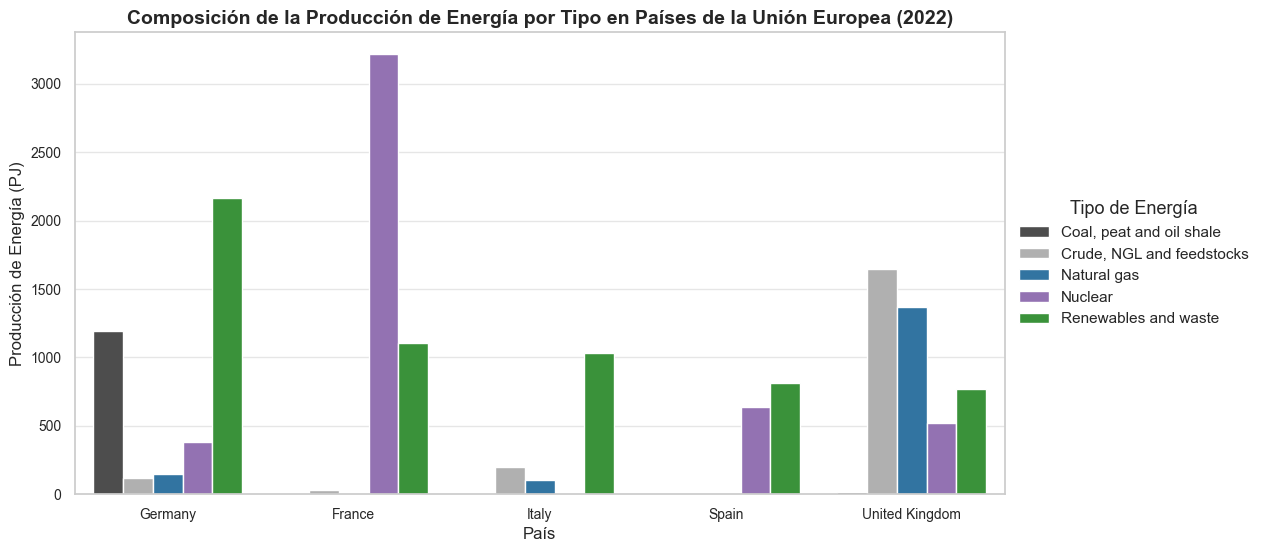

In [602]:
# Filtrar datos para "Production (PJ)" en el último año (2022) usando balance_europe
df_production_2022 = filter_bal(
    balance_europe,
    Energy_Activity="Production (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Excluir el tipo "Total" en Energy_Type
df_production_2022 = df_production_2022[df_production_2022['Energy_Type'] != "Total"]

# Incluir todos los tipos de energía para producción, según la lista proporcionada
valid_energy_types = [
    "Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"
]
df_production_2022 = df_production_2022[df_production_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por país (Country) y tipo de energía para obtener el total de producción por tipo de energía
df_total_production_2022 = df_production_2022.groupby(['Country', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Ordenar el eje X de mayor a menor volumen de Renewables en valor absoluto
df_renewables = df_total_production_2022[df_total_production_2022['Energy_Type'] == "Renewables and waste"]
country_order = df_renewables.sort_values(by='Energy_Value', ascending=False)['Country']
df_total_production_2022['Country'] = pd.Categorical(df_total_production_2022['Country'], categories=country_order, ordered=True)

# Definir el orden específico de tipos de energía para la leyenda
energy_order = ["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Natural gas", "Nuclear", "Renewables and waste"]

# Graficar en columnas apiladas usando valores absolutos
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_total_production_2022,
    x="Country",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_order,    # Asegurar el orden específico de la leyenda
    palette=color_palette      # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Composición de la Producción de Energía por Tipo en Países de la Unión Europea (2022)", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Producción de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\3679402957.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


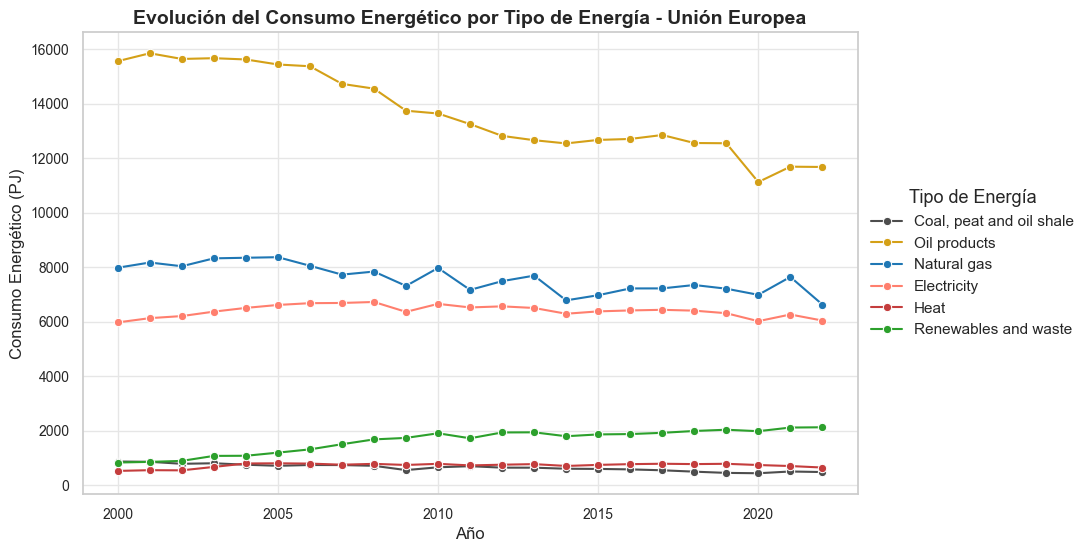

In [605]:
# Filtrar datos para la región "European Union" y la actividad "Total final consumption (PJ)" entre 2000 y 2022
df = filter_bal(
    balance, 
    Region="European Union", 
    Energy_Type=["Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"], 
    Energy_Activity="Total final consumption (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Agrupar para obtener la suma de 'Energy_Value' por cada año y tipo de energía
df_grouped = df.groupby(['Year', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Definir el orden específico de tipos de energía para la leyenda
energy_order_consumo = ["Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"]

# Gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_grouped,
    x="Year",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_order_consumo,  # Mantener el orden específico de la leyenda
    palette=color_palette,           # Usar la paleta de colores definida
    marker="o",
    linewidth=1.5,
    ci=None  # Desactivar el sombreado de banda de confianza
)

# Ajuste de estilo y etiquetas
plt.title("Evolución del Consumo Energético por Tipo de Energía - Unión Europea", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Consumo Energético (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",             # Posición de la leyenda
    bbox_to_anchor=(1, 0.5)        # Coordenadas para mover la leyenda fuera del gráfico, a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()



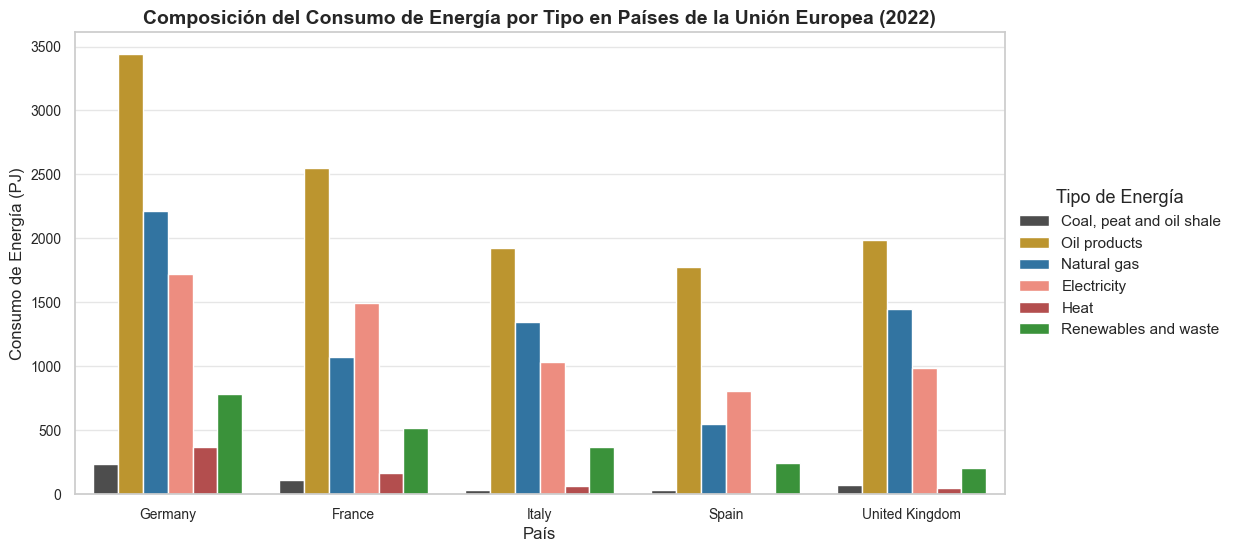

In [607]:
# Filtrar datos para "Total final consumption (PJ)" en el último año (2022) usando balance_europe
df_consumption_2022 = filter_bal(
    balance_europe,
    Energy_Activity="Total final consumption (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Excluir el tipo "Total" en Energy_Type
df_consumption_2022 = df_consumption_2022[df_consumption_2022['Energy_Type'] != "Total"]

# Incluir todos los tipos de energía para consumo, según la lista proporcionada
valid_energy_types = [
    "Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"
]
df_consumption_2022 = df_consumption_2022[df_consumption_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por país (Country) y tipo de energía para obtener el total de consumo por tipo de energía
df_total_consumption_2022 = df_consumption_2022.groupby(['Country', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Ordenar el eje X de mayor a menor volumen de Renewables en valor absoluto
df_renewables = df_total_consumption_2022[df_total_consumption_2022['Energy_Type'] == "Renewables and waste"]
country_order = df_renewables.sort_values(by='Energy_Value', ascending=False)['Country']
df_total_consumption_2022['Country'] = pd.Categorical(df_total_consumption_2022['Country'], categories=country_order, ordered=True)

# Definir el orden específico de tipos de energía para la leyenda
energy_order_consumo = ["Coal, peat and oil shale", "Oil products", "Natural gas", "Electricity", "Heat", "Renewables and waste"]

# Graficar en columnas apiladas usando valores absolutos
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_total_consumption_2022,
    x="Country",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_order_consumo,    # Asegurar el orden específico de la leyenda
    palette=color_palette               # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Composición del Consumo de Energía por Tipo en Países de la Unión Europea (2022)", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Consumo de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29988\63668023.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


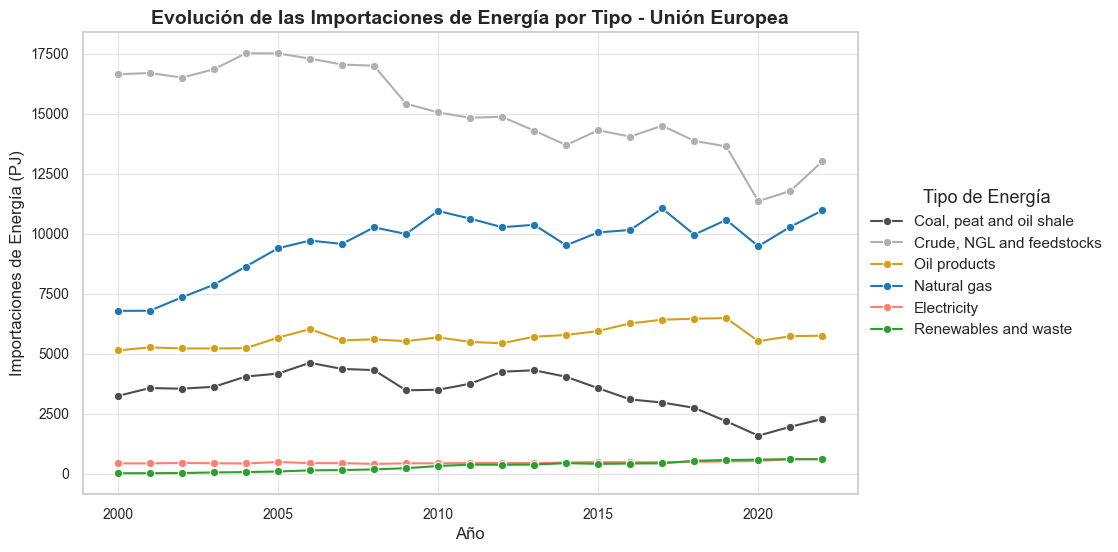

In [606]:
# Filtrar datos para la región "European Union" y la actividad "Imports (PJ)" entre 2000 y 2022
df = filter_bal(
    balance, 
    Region="European Union", 
    Energy_Type=["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"], 
    Energy_Activity="Imports (PJ)", 
    Start_Year=2000, 
    End_Year=2022
)

# Agrupar para obtener la suma de 'Energy_Value' por cada año y tipo de energía
df_grouped = df.groupby(['Year', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Definir el orden específico de tipos de energía para la leyenda en Importaciones
energy_order_importaciones = ["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"]

# Gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_grouped,
    x="Year",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_order_importaciones,  # Mantener el orden específico de la leyenda
    palette=color_palette,                 # Usar la paleta de colores definida
    marker="o",
    linewidth=1.5,
    ci=None  # Desactivar el sombreado de banda de confianza
)

# Ajuste de estilo y etiquetas
plt.title("Evolución de las Importaciones de Energía por Tipo - Unión Europea", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Importaciones de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",             # Posición de la leyenda
    bbox_to_anchor=(1, 0.5)        # Coordenadas para mover la leyenda fuera del gráfico, a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


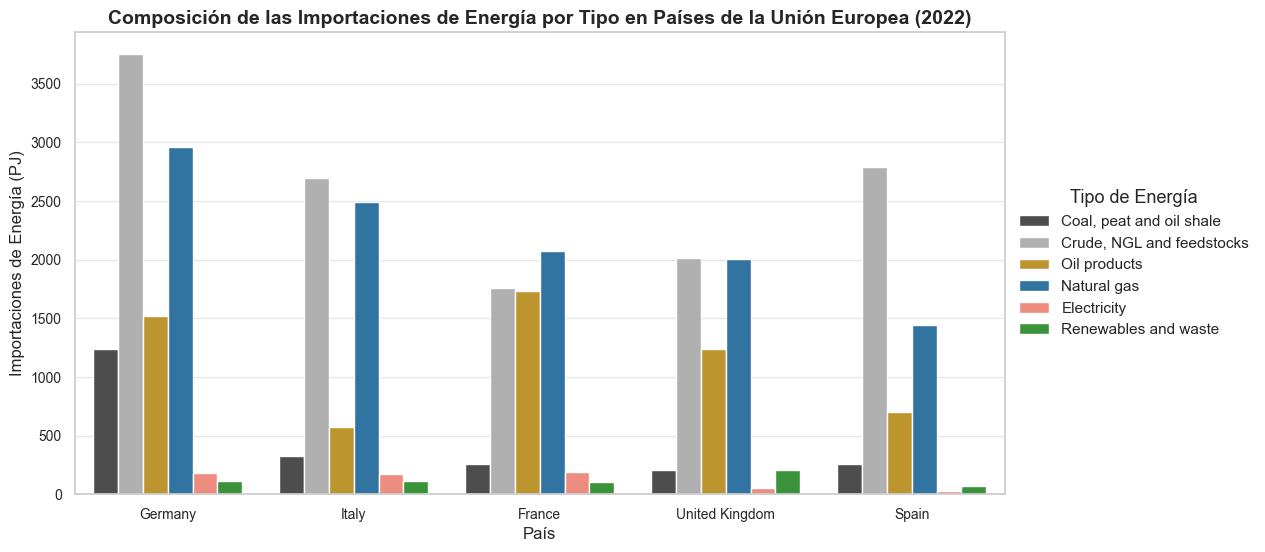

In [609]:
# Filtrar datos para "Imports (PJ)" en el último año (2022) usando balance_europe
df_imports_2022 = filter_bal(
    balance_europe,
    Energy_Activity="Imports (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Excluir el tipo "Total" en Energy_Type
df_imports_2022 = df_imports_2022[df_imports_2022['Energy_Type'] != "Total"]

# Incluir todos los tipos de energía para importaciones, según la lista proporcionada
valid_energy_types = [
    "Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"
]
df_imports_2022 = df_imports_2022[df_imports_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por país (Country) y tipo de energía para obtener el total de importaciones por tipo de energía
df_total_imports_2022 = df_imports_2022.groupby(['Country', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Calcular el total de importaciones por país y ordenar de mayor a menor
country_order = df_total_imports_2022.groupby('Country')['Energy_Value'].sum().sort_values(ascending=False).index
df_total_imports_2022['Country'] = pd.Categorical(df_total_imports_2022['Country'], categories=country_order, ordered=True)

# Definir el orden específico de tipos de energía para la leyenda
energy_order_importaciones = ["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"]

# Graficar en columnas apiladas usando valores absolutos y con el eje X ordenado de mayor a menor importador
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_total_imports_2022,
    x="Country",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_order_importaciones,  # Asegurar el orden específico de la leyenda
    palette=color_palette                   # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Composición de las Importaciones de Energía por Tipo en Países de la Unión Europea (2022)", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Importaciones de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


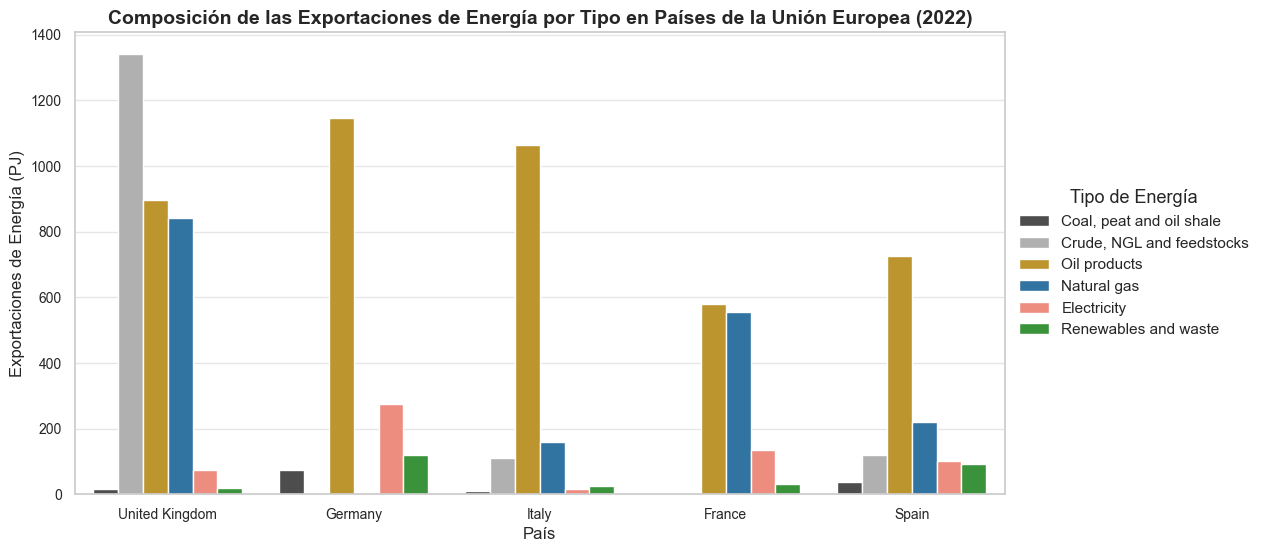

In [610]:
# Filtrar datos para "Exports (PJ)" en el último año (2022) usando balance_europe
df_exports_2022 = filter_bal(
    balance_europe,
    Energy_Activity="Exports (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Excluir el tipo "Total" en Energy_Type
df_exports_2022 = df_exports_2022[df_exports_2022['Energy_Type'] != "Total"]

# Incluir todos los tipos de energía para exportaciones, según la lista proporcionada
valid_energy_types = [
    "Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"
]
df_exports_2022 = df_exports_2022[df_exports_2022['Energy_Type'].isin(valid_energy_types)]

# Agrupar por país (Country) y tipo de energía para obtener el total de exportaciones por tipo de energía
df_total_exports_2022 = df_exports_2022.groupby(['Country', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Calcular el total de exportaciones por país y ordenar de mayor a menor
country_order = df_total_exports_2022.groupby('Country')['Energy_Value'].sum().sort_values(ascending=False).index
df_total_exports_2022['Country'] = pd.Categorical(df_total_exports_2022['Country'], categories=country_order, ordered=True)

# Definir el orden específico de tipos de energía para la leyenda
energy_order_exportaciones = ["Coal, peat and oil shale", "Crude, NGL and feedstocks", "Oil products", "Natural gas", "Electricity", "Renewables and waste"]

# Graficar en columnas apiladas usando valores absolutos y con el eje X ordenado de mayor a menor exportador
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_total_exports_2022,
    x="Country",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=energy_order_exportaciones,  # Asegurar el orden específico de la leyenda
    palette=color_palette                   # Usar la paleta de colores definida
)

# Ajuste de estilo y etiquetas
plt.title("Composición de las Exportaciones de Energía por Tipo en Países de la Unión Europea (2022)", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Exportaciones de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()


# Análisis por Sector

Para proceder con el análisis por sector, antes es necesario aclarar que el análisis se enfocará en las 5 principales economias del mundo que lideran la transición a energias renovales y son representativas de los esfuerzos en sus respectivos continentes.
- Estados Unidos (United States)
- Unión Europea (EU)  
- China
- India
- Brasil (Brazil) 

In [ ]:
# El balance global incluye las siguientes regiones económicas
balance_global.loc[:,"Region"].unique()

array(['European Union', 'United States', 'Brazil', 'China', 'India'],
      dtype=object)

In [ ]:
# Para el análisis se incluyen los sectores que componen el consumo total
consumption_sectors = ["Industry (PJ)","Transport (PJ)","Residential (PJ)","Commercial and public services (PJ)","Other final consumption (PJ)"]

In [652]:
# Se incluyen los siguientes tipos de energia solo para consumo:

consumption_energy_types = [
    "Coal, peat and oil shale",
    "Oil products",
    "Natural gas",
    "Electricity",
    "Heat",
    "Renewables and waste"
]


In [663]:
# Diccionario de colores para cada sector de consumo, con el ajuste a amarillo para "Other final consumption (PJ)"
consumption_palette = {
    "Industry (PJ)": "#708090",                    # Gris acero para Industry
    "Transport (PJ)": "#1E3A5F",                   # Azul oscuro para Transport
    "Residential (PJ)": "#6BA292",                 # Verde suave para Residential
    "Commercial and public services (PJ)": "#8DA0BC",  # Azul grisáceo para Commercial and public services
    "Other final consumption (PJ)": "#D4B483"      # Amarillo profesional para Other final consumption
}

# Orden deseado para los sectores de consumo
sector_order = [
    "Industry (PJ)",
    "Transport (PJ)",
    "Residential (PJ)",
    "Commercial and public services (PJ)",
    "Other final consumption (PJ)"
]



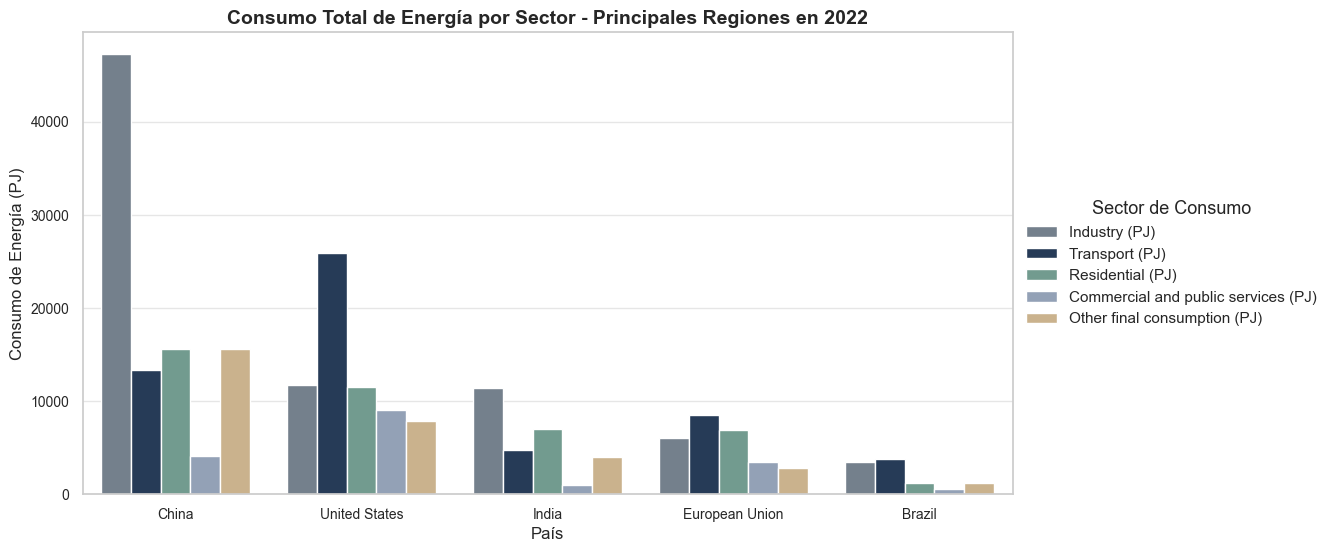

In [659]:
# Filtrar datos para "Total final consumption (PJ)" en el último año (2022)
df_consumption_2022 = filter_bal(
    balance_global,
    Energy_Type="Total",
    Energy_Activity=consumption_sectors,
    Start_Year=2022,
    End_Year=2022
)

# Agrupar por región y sector para obtener el consumo total por sector en cada país
df_consumption_2022 = df_consumption_2022.groupby(['Region', 'Energy_Activity'])['Energy_Value'].sum().reset_index()

# Ordenar las regiones por el consumo total (de mayor a menor)
region_order = df_consumption_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_consumption_2022['Region'] = pd.Categorical(df_consumption_2022['Region'], categories=region_order, ordered=True)

# Ordenar `Energy_Activity` según el orden especificado
df_consumption_2022['Energy_Activity'] = pd.Categorical(df_consumption_2022['Energy_Activity'], categories=sector_order, ordered=True)

# Graficar con el nuevo orden
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_consumption_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Activity",
    hue_order=sector_order,  # Asegurar el orden de los sectores en la leyenda
    palette=consumption_palette  # Usar la paleta de colores definida para cada sector
)

# Ajuste de estilo y etiquetas
plt.title("Consumo Total de Energía por Sector - Principales Regiones en 2022", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Consumo de Energía (PJ)", fontsize=12)
plt.legend(
    title="Sector de Consumo",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)  # Eliminado rotation=45 para etiquetas horizontales
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()



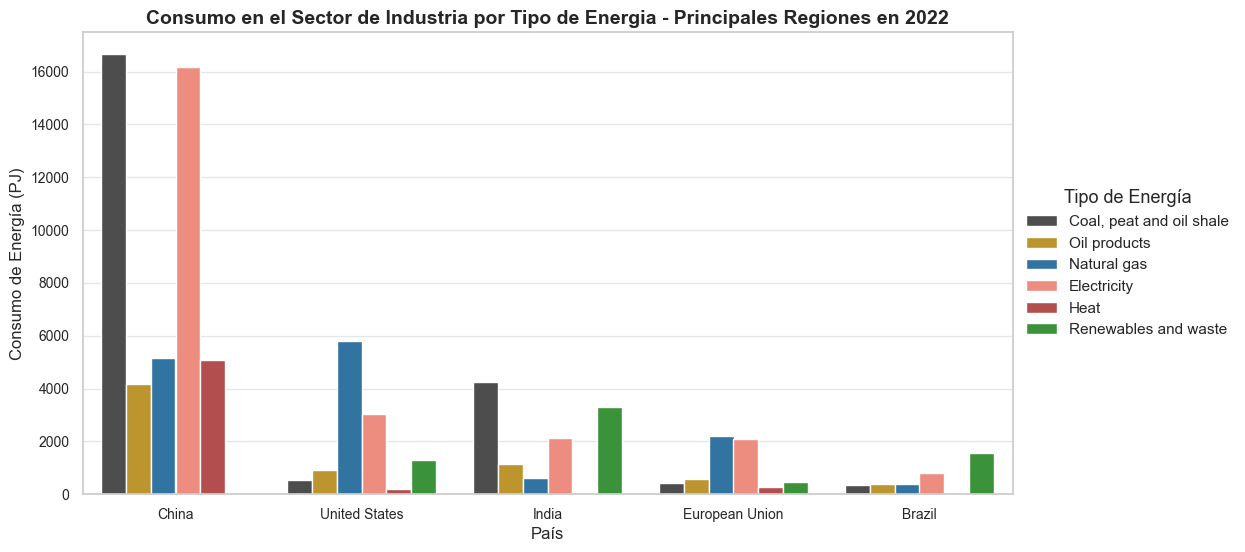

In [666]:
# Filtrar datos para "Total final consumption (PJ)" en el último año (2022)
df_consumption_2022 = filter_bal(
    balance_global,
    Energy_Type=consumption_energy_types,
    Energy_Activity="Industry (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Agrupar por región y sector para obtener el consumo total por sector en cada país
df_consumption_2022 = df_consumption_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Ordenar las regiones por el consumo total (de mayor a menor)
region_order = df_consumption_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_consumption_2022['Region'] = pd.Categorical(df_consumption_2022['Region'], categories=region_order, ordered=True)

# Ordenar `Energy_Type` según el orden especificado
df_consumption_2022['Energy_Type'] = pd.Categorical(df_consumption_2022['Energy_Type'], categories=consumption_energy_types, ordered=True)

# Graficar con el nuevo orden
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_consumption_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=consumption_energy_types,  # Asegurar el orden de los sectores en la leyenda
    palette=color_palette  # Usar la paleta de colores definida para cada Tipo de Energia
)

# Ajuste de estilo y etiquetas
plt.title("Consumo en el Sector de Industria por Tipo de Energia - Principales Regiones en 2022", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Consumo de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)  # Eliminado rotation=45 para etiquetas horizontales
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()

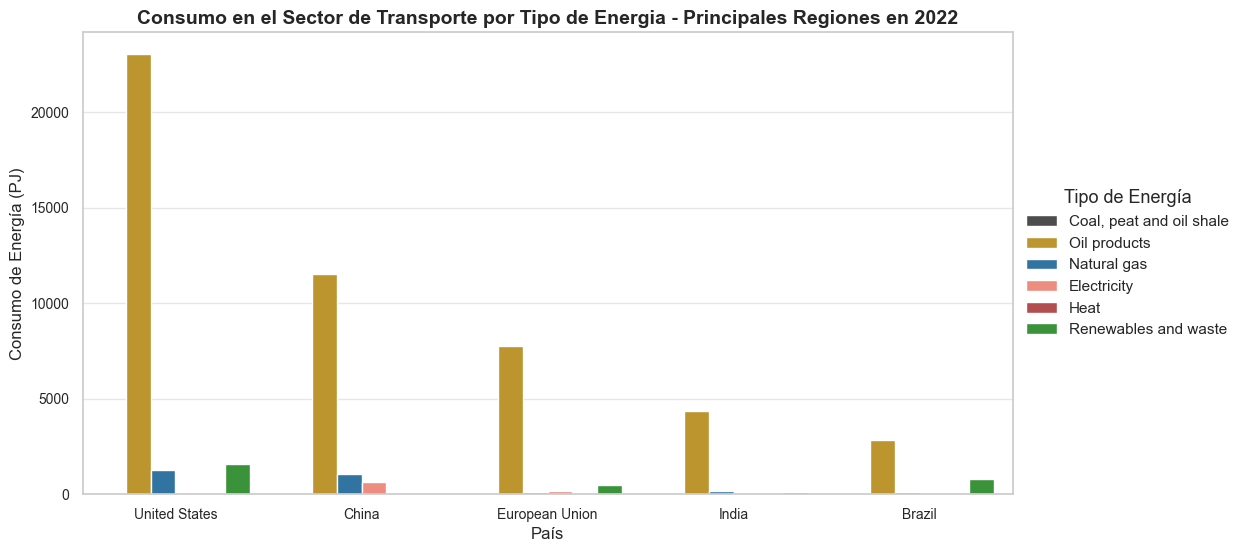

In [670]:
# Filtrar datos para "Total final consumption (PJ)" en el último año (2022)
df_consumption_2022 = filter_bal(
    balance_global,
    Energy_Type=consumption_energy_types,
    Energy_Activity="Transport (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Agrupar por región y sector para obtener el consumo total por sector en cada país
df_consumption_2022 = df_consumption_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Ordenar las regiones por el consumo total (de mayor a menor)
region_order = df_consumption_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_consumption_2022['Region'] = pd.Categorical(df_consumption_2022['Region'], categories=region_order, ordered=True)

# Ordenar `Energy_Type` según el orden especificado
df_consumption_2022['Energy_Type'] = pd.Categorical(df_consumption_2022['Energy_Type'], categories=consumption_energy_types, ordered=True)

# Graficar con el nuevo orden
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_consumption_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=consumption_energy_types,  # Asegurar el orden de los sectores en la leyenda
    palette=color_palette  # Usar la paleta de colores definida para cada Tipo de Energia
)

# Ajuste de estilo y etiquetas
plt.title("Consumo en el Sector de Transporte por Tipo de Energia - Principales Regiones en 2022", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Consumo de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)  # Eliminado rotation=45 para etiquetas horizontales
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()

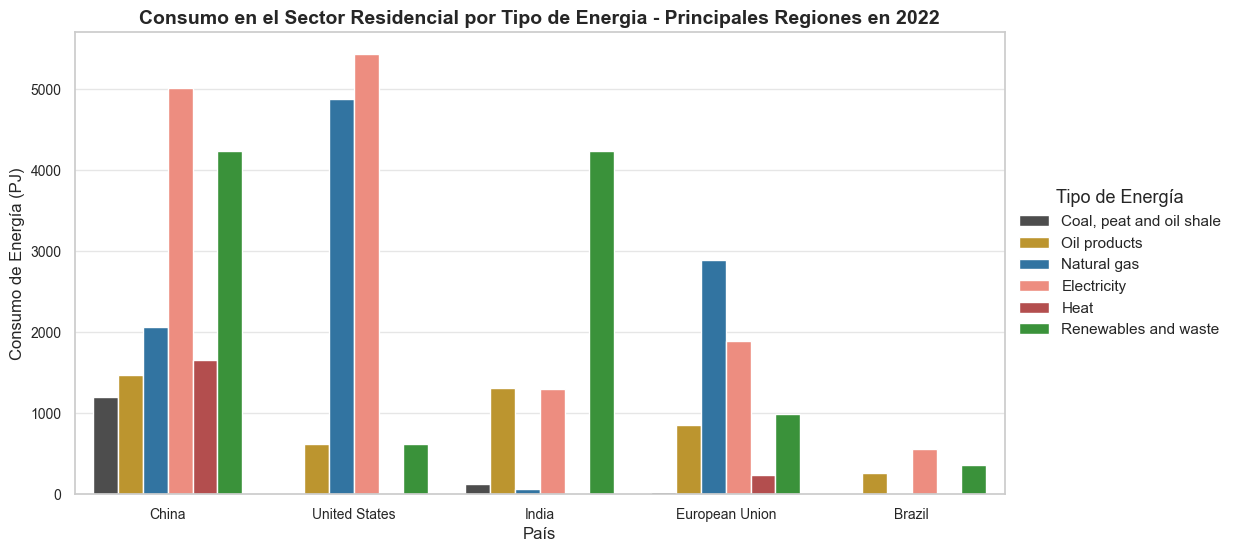

In [668]:
# Filtrar datos para "Total final consumption (PJ)" en el último año (2022)
df_consumption_2022 = filter_bal(
    balance_global,
    Energy_Type=consumption_energy_types,
    Energy_Activity="Residential (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Agrupar por región y sector para obtener el consumo total por sector en cada país
df_consumption_2022 = df_consumption_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Ordenar las regiones por el consumo total (de mayor a menor)
region_order = df_consumption_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_consumption_2022['Region'] = pd.Categorical(df_consumption_2022['Region'], categories=region_order, ordered=True)

# Ordenar `Energy_Type` según el orden especificado
df_consumption_2022['Energy_Type'] = pd.Categorical(df_consumption_2022['Energy_Type'], categories=consumption_energy_types, ordered=True)

# Graficar con el nuevo orden
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_consumption_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=consumption_energy_types,  # Asegurar el orden de los sectores en la leyenda
    palette=color_palette  # Usar la paleta de colores definida para cada Tipo de Energia
)

# Ajuste de estilo y etiquetas
plt.title("Consumo en el Sector Residencial por Tipo de Energia - Principales Regiones en 2022", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Consumo de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)  # Eliminado rotation=45 para etiquetas horizontales
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()

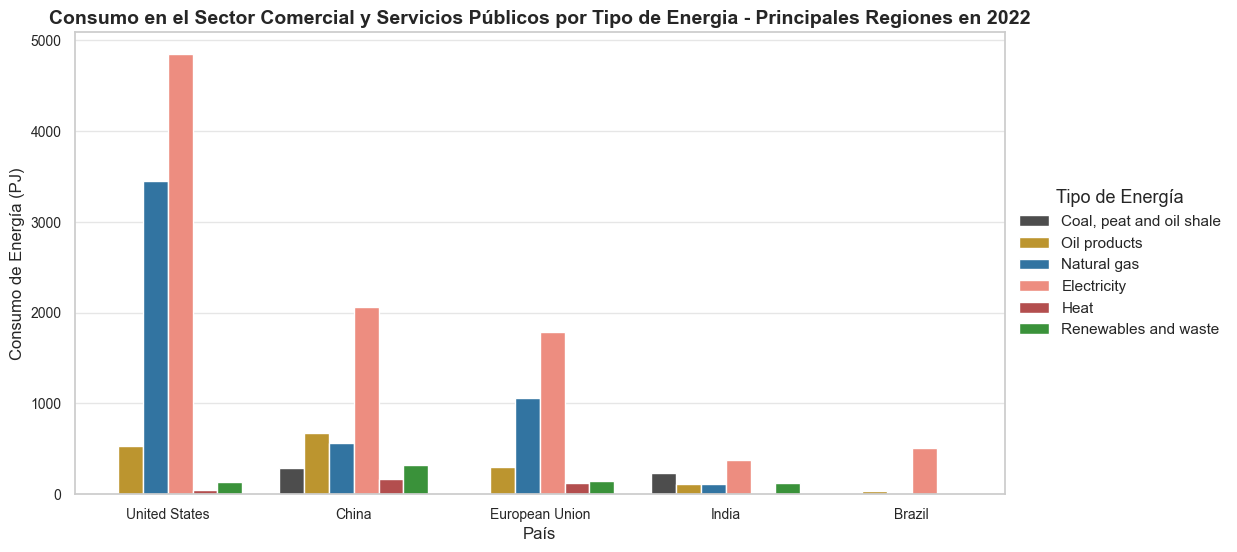

In [675]:
# Filtrar datos para "Total final consumption (PJ)" en el último año (2022)
df_consumption_2022 = filter_bal(
    balance_global,
    Energy_Type=consumption_energy_types,
    Energy_Activity="Commercial and public services (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Agrupar por región y sector para obtener el consumo total por sector en cada país
df_consumption_2022 = df_consumption_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Ordenar las regiones por el consumo total (de mayor a menor)
region_order = df_consumption_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_consumption_2022['Region'] = pd.Categorical(df_consumption_2022['Region'], categories=region_order, ordered=True)

# Ordenar `Energy_Type` según el orden especificado
df_consumption_2022['Energy_Type'] = pd.Categorical(df_consumption_2022['Energy_Type'], categories=consumption_energy_types, ordered=True)

# Graficar con el nuevo orden
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_consumption_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=consumption_energy_types,  # Asegurar el orden de los sectores en la leyenda
    palette=color_palette  # Usar la paleta de colores definida para cada Tipo de Energia
)

# Ajuste de estilo y etiquetas
plt.title("Consumo en el Sector Comercial y Servicios Públicos por Tipo de Energia - Principales Regiones en 2022", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Consumo de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)  # Eliminado rotation=45 para etiquetas horizontales
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()

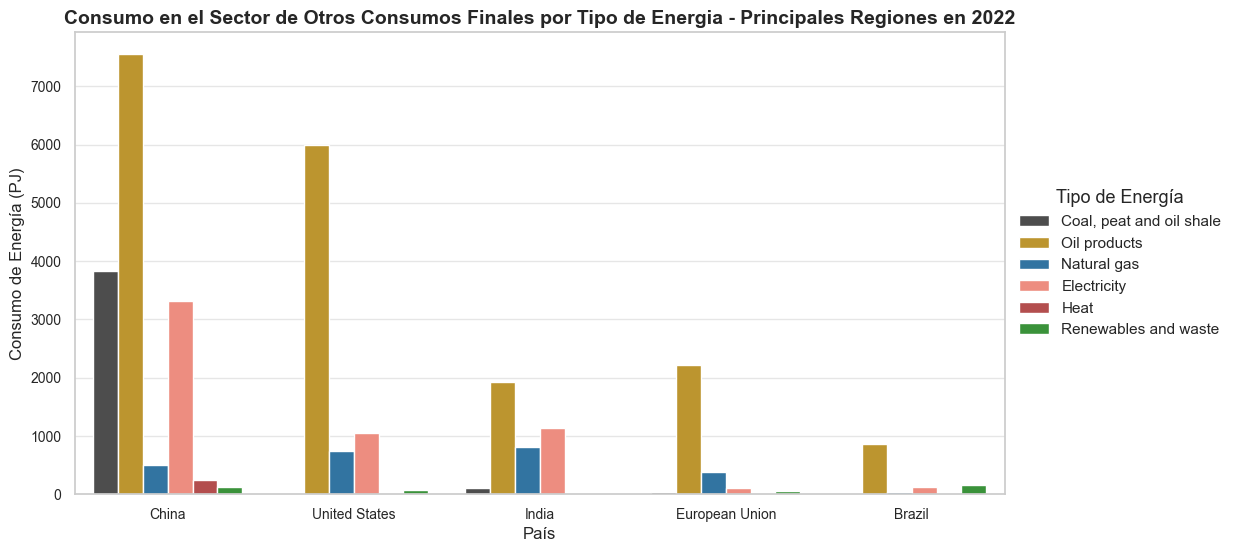

In [678]:
# Filtrar datos para "Total final consumption (PJ)" en el último año (2022)
df_consumption_2022 = filter_bal(
    balance_global,
    Energy_Type=consumption_energy_types,
    Energy_Activity="Other final consumption (PJ)",
    Start_Year=2022,
    End_Year=2022
)

# Agrupar por región y sector para obtener el consumo total por sector en cada país
df_consumption_2022 = df_consumption_2022.groupby(['Region', 'Energy_Type'])['Energy_Value'].sum().reset_index()

# Ordenar las regiones por el consumo total (de mayor a menor)
region_order = df_consumption_2022.groupby('Region')['Energy_Value'].sum().sort_values(ascending=False).index
df_consumption_2022['Region'] = pd.Categorical(df_consumption_2022['Region'], categories=region_order, ordered=True)

# Ordenar `Energy_Type` según el orden especificado
df_consumption_2022['Energy_Type'] = pd.Categorical(df_consumption_2022['Energy_Type'], categories=consumption_energy_types, ordered=True)

# Graficar con el nuevo orden
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_consumption_2022,
    x="Region",
    y="Energy_Value",
    hue="Energy_Type",
    hue_order=consumption_energy_types,  # Asegurar el orden de los sectores en la leyenda
    palette=color_palette  # Usar la paleta de colores definida para cada Tipo de Energia
)

# Ajuste de estilo y etiquetas
plt.title("Consumo en el Sector de Otros Consumos Finales por Tipo de Energia - Principales Regiones en 2022", fontsize=14, weight='bold')
plt.xlabel("País", fontsize=12)
plt.ylabel("Consumo de Energía (PJ)", fontsize=12)
plt.legend(
    title="Tipo de Energía",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Leyenda fuera del gráfico a la derecha
)
plt.xticks(fontsize=10)  # Eliminado rotation=45 para etiquetas horizontales
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()

In [679]:
balance_global.loc[(balance_global.loc[:,"Region"] == "United States") & (balance_global.loc[:,"Energy_Activity"] == "Other final consumption (PJ)") & (balance_global.loc[:,"Year"] == 2022),:]

,Region,Country,Energy_Type,Energy_Activity,Year,Energy_Value
154311,United States,United States,"Coal, peat and oil shale",Other final consumption (PJ),2022,0.00
154323,United States,United States,"Crude, NGL and feedstocks",Other final consumption (PJ),2022,0.00
154335,United States,United States,Oil products,Other final consumption (PJ),2022,6000.77
154347,United States,United States,Natural gas,Other final consumption (PJ),2022,735.00
154359,United States,United States,Nuclear,Other final consumption (PJ),2022,0.00
154371,United States,United States,Renewables and waste,Other final consumption (PJ),2022,79.07
154383,United States,United States,Electricity,Other final consumption (PJ),2022,1042.82
154395,United States,United States,Heat,Other final consumption (PJ),2022,NaN
154407,United States,United States,Total,Other final consumption (PJ),2022,7857.67


# Análisis de Emisiones

Los datos de desglose de energias consumidas ya no son necesarios en esta sección debido a que ese análisis ya se efectuó en la sección de "Análisis por Sector". El análisis ahora se enfocará en emisiones y en emisiones por energía consumida. Para ello, procederemos a filtrar y simplificar el dataset a los totales por pais para que la creación de visualizaciones y y el desarrollo de análisis sean mas sencillos.  

**NOTA:** Se estan incluyendo las principales economías del mundo al igual que en anteriores análisis, sin embargo, lamentablemente para esta sección en específico no se pudo incluir ni a China ni a India debido a que no se tiene data de los paises en el reporte utilizado. Igualmente, se decidió enfocar el análisis en las otras 3 regiones económicos para tener una idea generalizada de las emisiones por sector y la eficiencia energética en la actualidad.

In [695]:
# Se procede a filtrar y simplificar el df con la data que realmente se va a utilizar
efficiency
subsector_list = ["Total Residential","Total Services","Manufacturing [ISIC 10-18; 20-32]","Total passenger and freight transport"]
product_list = ["Total"]

efficiency_totals = efficiency.loc[(efficiency.loc[:,"Subsector"].isin(subsector_list)) & (efficiency.loc[:,"Product"].isin(product_list))]
efficiency_totals

,Country,Sector,Subsector,Product,Year,Energy_(PJ),Emissions_(MtCO2)
7,Australia,Residential,Total Residential,Total,2000,378.56,54.93
21,Austria,Residential,Total Residential,Total,2000,267.48,13.57
35,Belgium,Residential,Total Residential,Total,2000,397.54,27.71
49,Canada,Residential,Total Residential,Total,2000,1305.88,83.48
63,Czech Republic,Residential,Total Residential,Total,2000,281.51,30.01
...,...,...,...,...,...,...,...
37109,Serbia,Transport,Total passenger and freight transport,Total,2021,104.55,7.83
37129,Slovenia,Transport,Total passenger and freight transport,Total,2021,NaN,NaN
37149,Chinese Taipei,Transport,Total passenger and freight transport,Total,2021,483.07,38.62
37169,Uruguay,Transport,Total passenger and freight transport,Total,2021,NaN,NaN


In [726]:
# Ahora se procede a crear la columna región para reunir a Europa
efficiency_totals["Region"] = efficiency_totals["Country"]
efficiency_totals

# Se re-ordena y se quita sub-sector, el cual ya no sera necesario
efficiency_totals = efficiency_totals.loc[:,["Region","Country","Sector","Product","Year","Energy_(PJ)","Emissions_(MtCO2)"]]
efficiency_totals

# Se procede a agrupar a Europa
european_countries_efficiency = ["Germany","France","Italy","Spain","United Kingdom"]

efficiency_totals.loc[efficiency_totals.loc[:,"Country"].isin(european_countries_efficiency),"Region"] = "European Union"
efficiency_totals.loc[:,"Region"].unique()


array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'European Union', 'Greece',
       'Hungary', 'Ireland', 'Japan', 'Korea', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Sweden', 'Switzerland',
       'Republic of Türkiye', 'United States', 'IEA Total', 'Argentina',
       'Brazil', 'Morocco', 'South Africa', 'Ukraine', 'Chile',
       'Colombia', 'Latvia', 'Albania', 'Armenia', 'Azerbaijan',
       'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Georgia', 'Hong Kong (China)', 'Kazakhstan', 'Kosovo',
       'Kyrgyzstan', 'Malta', 'Republic of Moldova',
       'Republic of North Macedonia', 'Romania', 'Serbia', 'Slovenia',
       'Chinese Taipei', 'Uruguay', 'Uzbekistan'], dtype=object)

In [741]:
# Se procede a hacer un dataframe solo con los datos totales de la IEA
efficiency_IEA_Total = efficiency_totals.loc[efficiency_totals.loc[:,"Region"] == "IEA Total"]

In [735]:
# Ahora se procede a filtrar para las regiones de interés del análisis
regions_efficiency = ["United States","European Union","Brazil"]
efficiency_analysis = efficiency_totals.loc[efficiency_totals.loc[:,"Region"].isin(regions_efficiency)]
efficiency_analysis =  efficiency_analysis.reset_index(drop=True)
efficiency_analysis

,Region,Country,Sector,Product,Year,Energy_(PJ),Emissions_(MtCO2)
0,European Union,France,Residential,Total,2000,1787.35,81.12
1,European Union,Germany,Residential,Total,2000,2658.37,223.28
2,European Union,Italy,Residential,Total,2000,1154.66,83.05
3,European Union,Spain,Residential,Total,2000,509.29,39.01
4,European Union,United Kingdom,Residential,Total,2000,1791.43,139.26
...,...,...,...,...,...,...,...
275,European Union,Italy,Transport,Total,2021,1444.64,103.78
276,European Union,Spain,Transport,Total,2021,1253.90,91.20
277,European Union,United Kingdom,Transport,Total,2021,1687.03,121.97
278,United States,United States,Transport,Total,2021,22475.62,1590.86


In [736]:
# Se crea otro df para el 2021
efficiency_analysis_2021 = efficiency_analysis.loc[efficiency_analysis.loc[:,"Year"] == 2021].reset_index(drop=True)
efficiency_analysis_2021

,Region,Country,Sector,Product,Year,Energy_(PJ),Emissions_(MtCO2)
0,European Union,France,Residential,Total,2021,1634.50,54.14
1,European Union,Germany,Residential,Total,2021,2313.53,144.48
2,European Union,Italy,Residential,Total,2021,1336.76,64.89
3,European Union,Spain,Residential,Total,2021,608.63,28.57
4,European Union,United Kingdom,Residential,Total,2021,1635.93,90.75
5,United States,United States,Residential,Total,2021,11612.25,942.70
6,Brazil,Brazil,Residential,Total,2021,1212.51,42.61
7,European Union,France,Services,Total,2021,898.59,31.66
8,European Union,Germany,Services,Total,2021,1011.10,83.04
9,European Union,Italy,Services,Total,2021,630.54,40.55


In [745]:
efficiency_palette = {
    "Industry": "#708090",                    # Gris acero para Industry
    "Transport": "#1E3A5F",                   # Azul oscuro para Transport
    "Residential": "#6BA292",                 # Verde suave para Residential
    "Services": "#8DA0BC",                      # Azul grisáceo para Commercial and public services
}

efficiency_sector_order = ["Industry", "Transport", "Residential", "Services"]

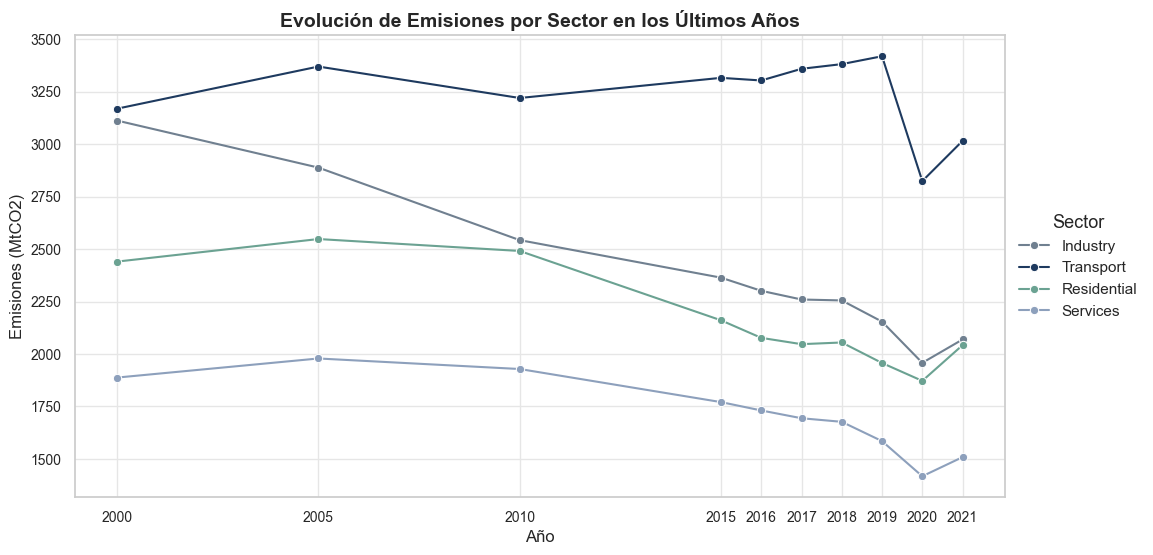

In [748]:
# Agrupar el DataFrame por Año y Sector para obtener la suma de emisiones por sector en cada año
df_grouped = efficiency_IEA_Total.groupby(['Year', 'Sector']).sum().reset_index()

# Configuración del gráfico en Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_grouped,            # DataFrame agrupado por año y sector con emisiones totales
    x="Year",                   # Columna para el eje x
    y="Emissions_(MtCO2)",      # Columna para el eje y
    hue="Sector",               # Columna para diferenciar por color las líneas de cada sector
    palette=efficiency_palette,
    marker="o",
    linewidth=1.5,
    hue_order=sector_order      # Definir el orden de los sectores en el gráfico
)

# Ajuste de estilo y etiquetas
plt.title("Evolución de Emisiones por Sector en los Últimos Años", fontsize=14, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Emisiones (MtCO2)", fontsize=12)
plt.legend(
    title="Sector",
    title_fontsize='13',
    fontsize='11',
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5)     # Leyenda fuera del gráfico a la derecha
)
plt.xticks(df_grouped['Year'].unique(), fontsize=10)  # Mostrar solo los años disponibles en el eje x
plt.yticks(fontsize=10)

# Mostrar gráfico (si se requiere solo en ejecución, omitir en caso de solo código)
plt.show()


In [737]:
efficiency_analysis

,Region,Country,Sector,Product,Year,Energy_(PJ),Emissions_(MtCO2)
0,European Union,France,Residential,Total,2000,1787.35,81.12
1,European Union,Germany,Residential,Total,2000,2658.37,223.28
2,European Union,Italy,Residential,Total,2000,1154.66,83.05
3,European Union,Spain,Residential,Total,2000,509.29,39.01
4,European Union,United Kingdom,Residential,Total,2000,1791.43,139.26
...,...,...,...,...,...,...,...
275,European Union,Italy,Transport,Total,2021,1444.64,103.78
276,European Union,Spain,Transport,Total,2021,1253.90,91.20
277,European Union,United Kingdom,Transport,Total,2021,1687.03,121.97
278,United States,United States,Transport,Total,2021,22475.62,1590.86


In [730]:
efficiency_analysis_2021.groupby(["Region","Sector"])[["Energy_(PJ)","Emissions_(MtCO2)"]].sum()


Energy_(PJ)  Emissions_(MtCO2)
Region         Sector                                     
Brazil         Industry         3544.59             129.36
               Residential      1212.51              42.61
               Services          528.50              23.35
               Transport        3753.45             226.07
European Union Industry         6674.15             407.48
               Residential      7529.35             382.83
               Services         3657.83             216.54
               Transport        7997.08             578.38
United States  Industry        10097.80             656.00
               Residential     11612.25             942.70
               Services         8731.26             758.74
               Transport       22475.62            1590.86